# Data Load

In [1]:
import pandas as pd
df = pd.read_csv('dataset/bank-additional-full.csv', sep=';')
df = df.drop_duplicates()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# General Info

In [2]:
# categorical (source: data_description.txt)
categorical_vars = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'day_of_week', 'poutcome'
]

# numeric (source: data_description.txt)
numeric_vars = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]

target_var = 'y'

In [3]:
# datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [4]:
# Numeric variable summary
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Unique values per variable
print(df.shape[0],"rows\n---")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

41176 rows
---
age: 78
job: 12
marital: 4
education: 8
default: 3
housing: 3
loan: 3
contact: 2
month: 10
day_of_week: 5
duration: 1544
campaign: 42
pdays: 27
previous: 8
poutcome: 3
emp.var.rate: 10
cons.price.idx: 26
cons.conf.idx: 26
euribor3m: 316
nr.employed: 11
y: 2


In [6]:
# txt shows missing values are represented as 'unknown'
print("\n'unknown' per variable:")
unknown_counts = (df == 'unknown').sum()

unknown_counts[unknown_counts > 0]


'unknown' per variable:


job           330
marital        80
education    1730
default      8596
housing       990
loan          990
dtype: int64

In [7]:
# easier for me to read as percentage
print("\n'unknown' % per variable:")
unknown_counts = (df == 'unknown').sum()
unknown_percentage = (unknown_counts / df.shape[0]) * 100
# save columns with unknown values for later use
unknown_columns = unknown_percentage[unknown_percentage > 0].index.tolist()

unknown_percentage[unknown_percentage > 0].sort_values(ascending=False)


'unknown' % per variable:


default      20.876239
education     4.201477
housing       2.404313
loan          2.404313
job           0.801438
marital       0.194288
dtype: float64

In [8]:
df["y"].value_counts(normalize=True)

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64

Indeed data is imbalanced. 11%

TO DO:
- Visual EDA
- NA Values management for categorical values
- Transform numeric variables with discrete values to categorical encoding if needed


# Visual EDA

## Categorical

Let's see the count per column and its proportions on target

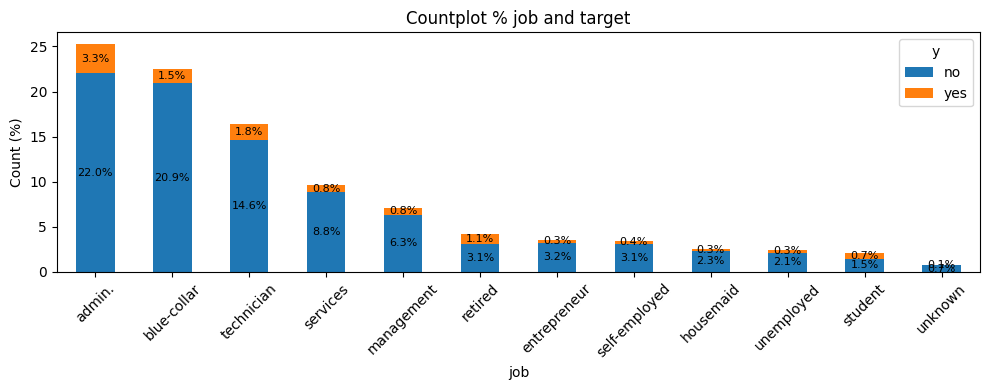

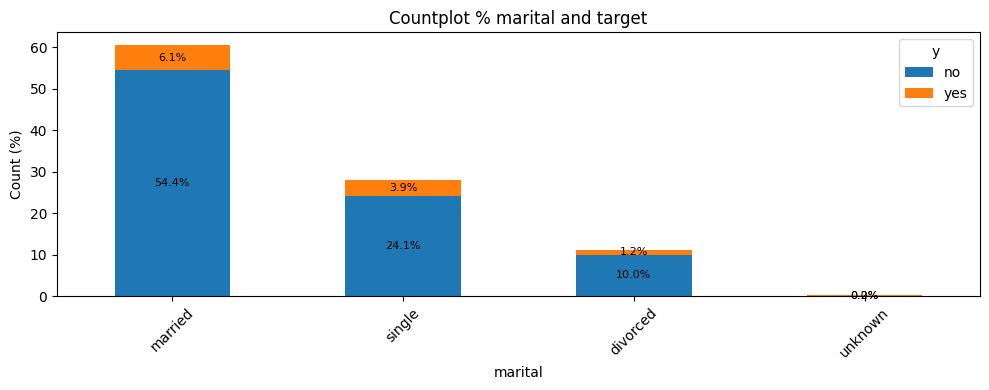

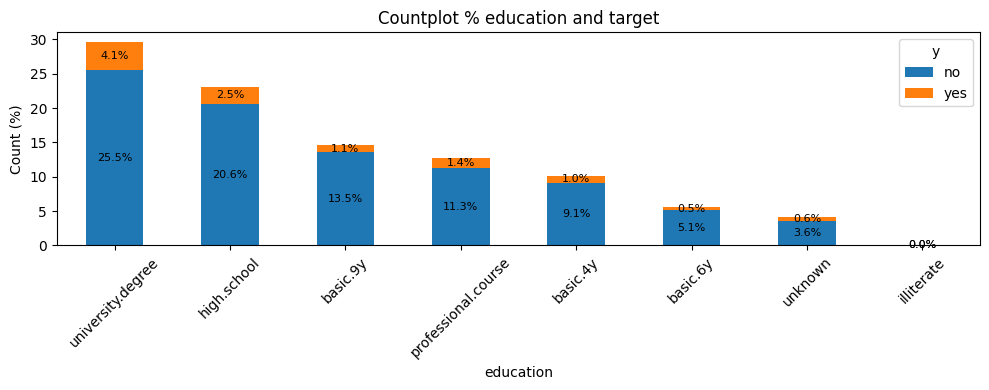

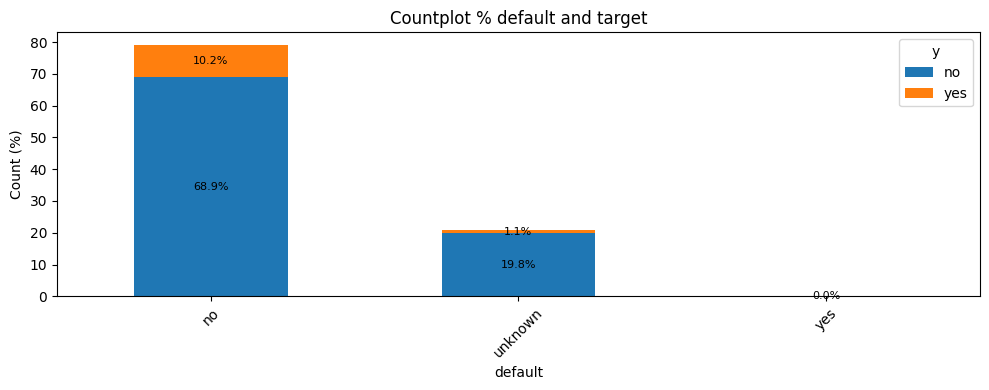

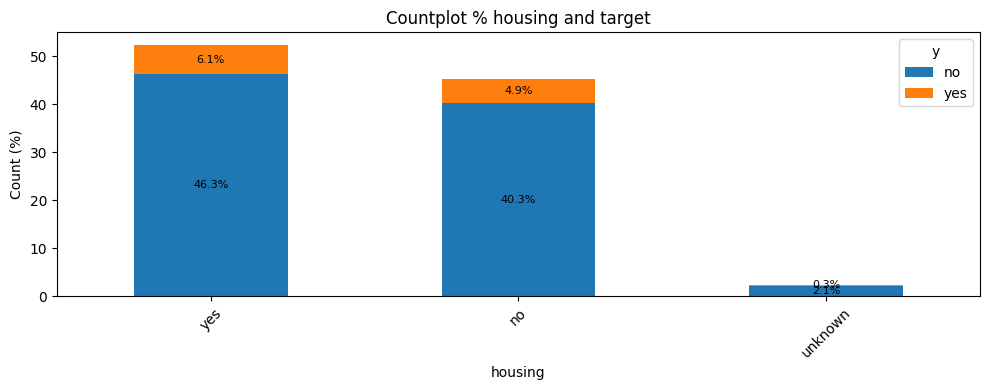

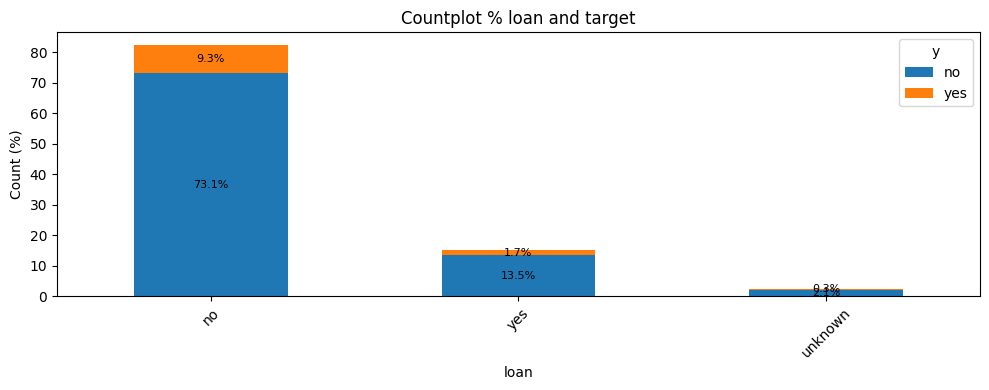

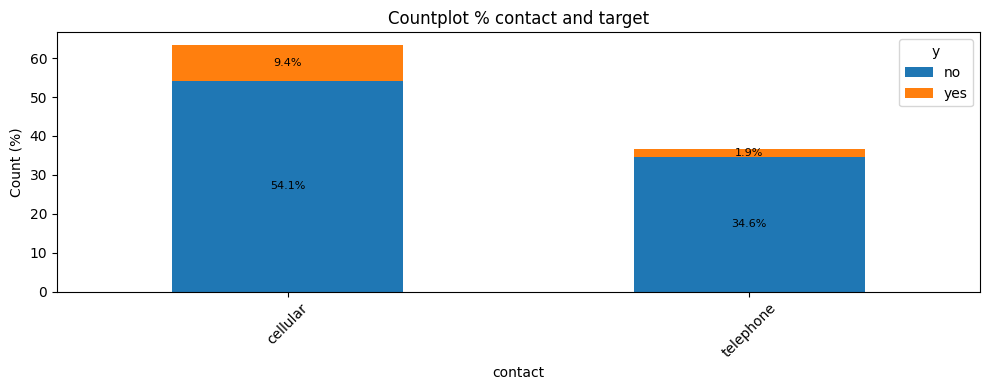

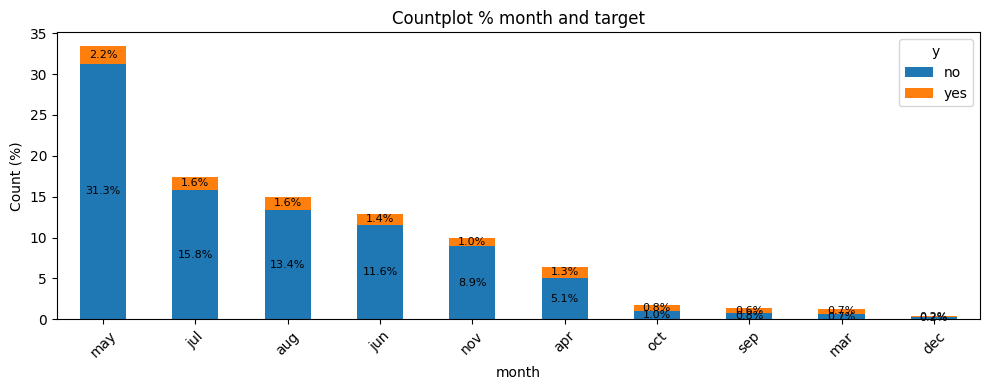

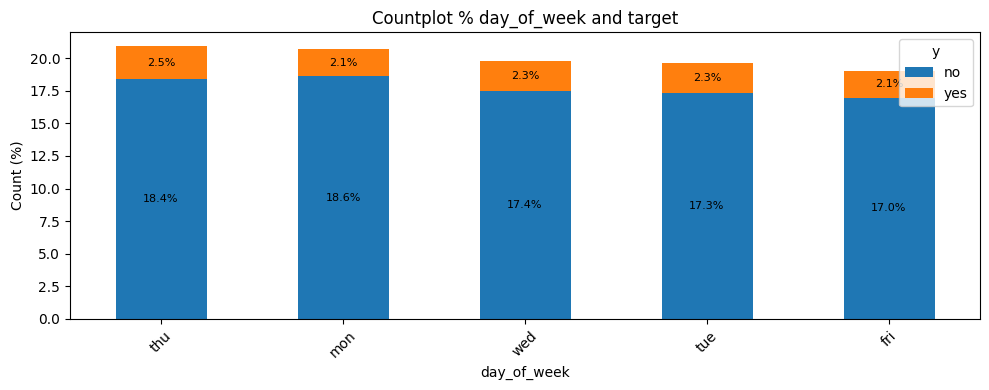

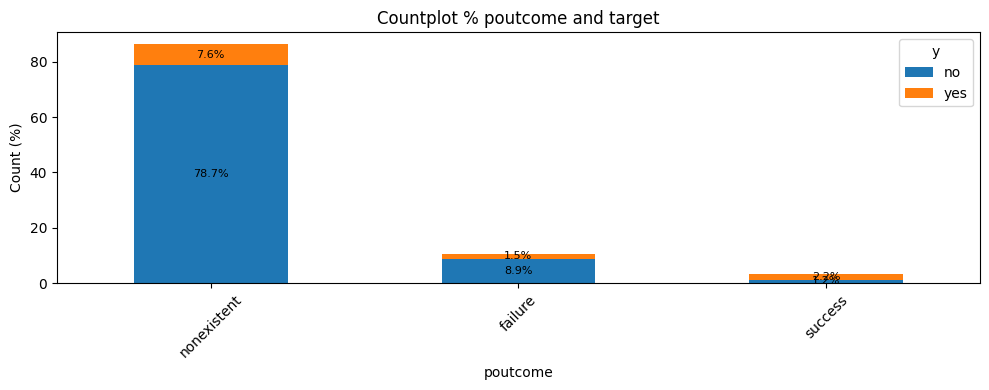

In [9]:
import matplotlib.pyplot as plt
import os

os.makedirs('plots/visualEDA', exist_ok=True)

# how target variable is distributed across categorical variables
for col in categorical_vars:
    count_data = pd.crosstab(df[col], df['y'])
    count_data = count_data.loc[df[col].value_counts().index]
    count_data_percent = count_data / len(df) * 100

    ax = count_data_percent.plot(
        kind='bar',
        stacked=True,
        figsize=(10, 4)
    )

    for container in ax.containers:
        labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
        ax.bar_label(container, labels=labels, label_type='center', fontsize=8)

    plt.title(f'Countplot % {col} and target')
    plt.ylabel('Count (%)')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(title='y', loc='upper right')
    plt.tight_layout()
    plt.savefig(f'plots/visualEDA/CAT_countplot_{col}_target.png')
    plt.show()

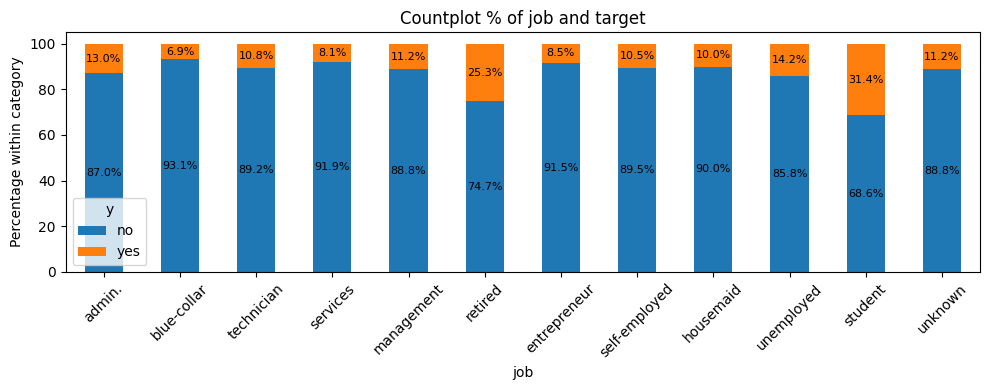

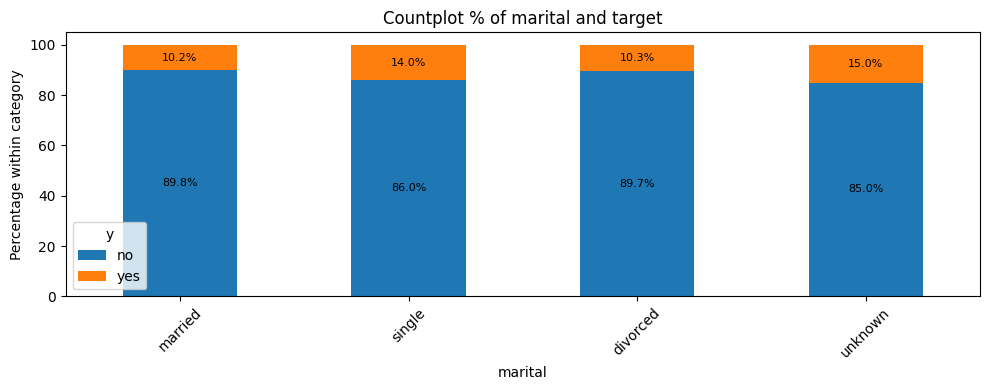

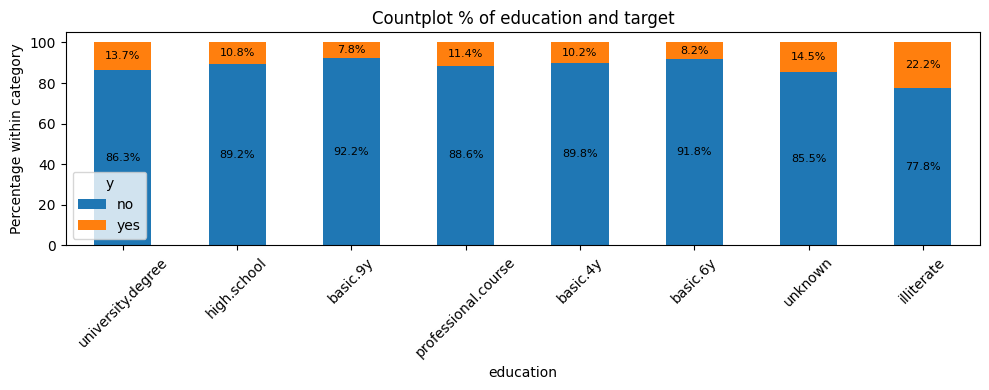

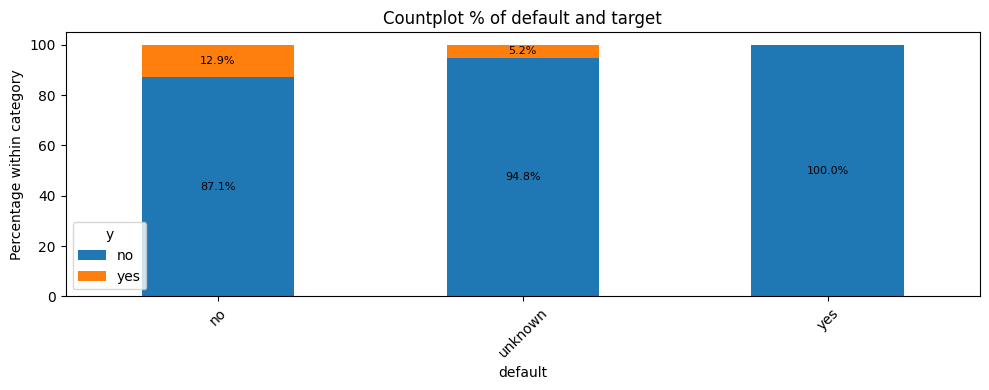

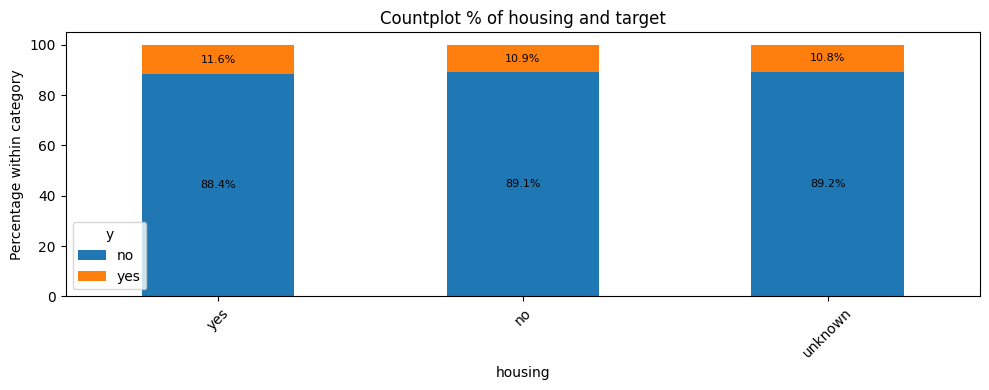

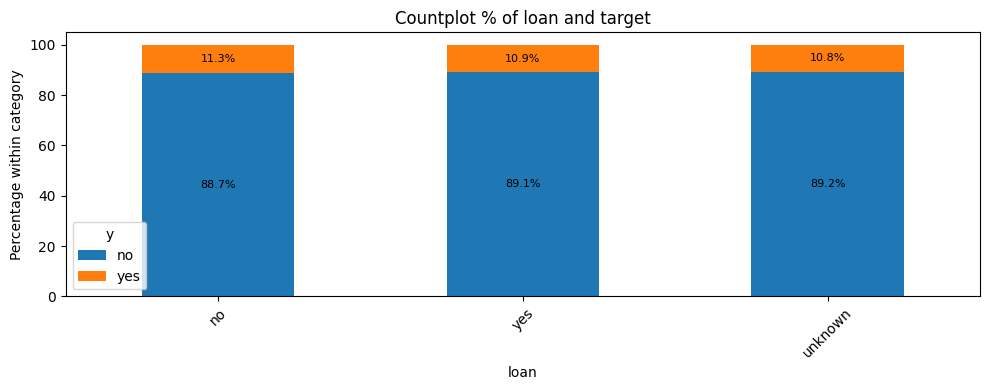

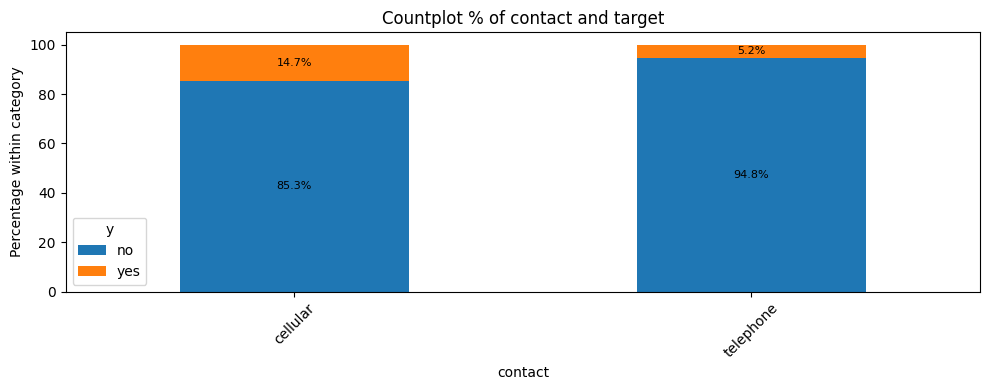

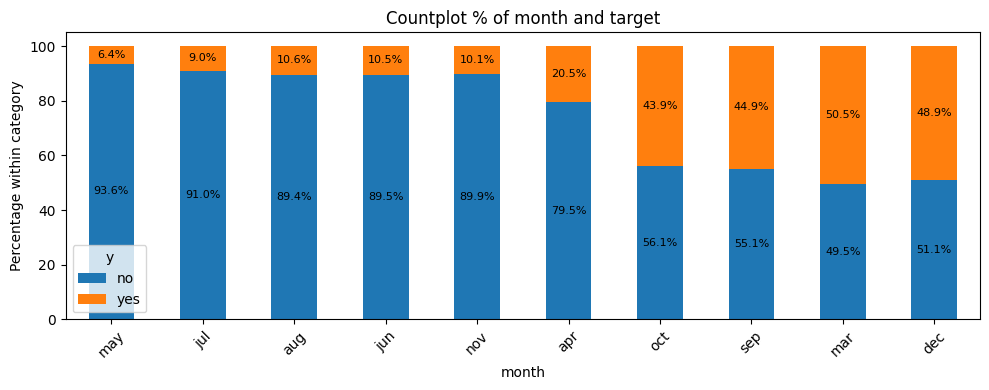

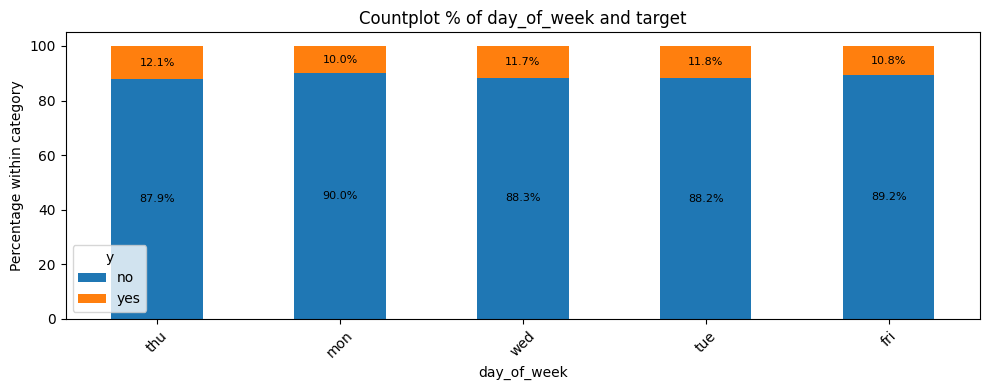

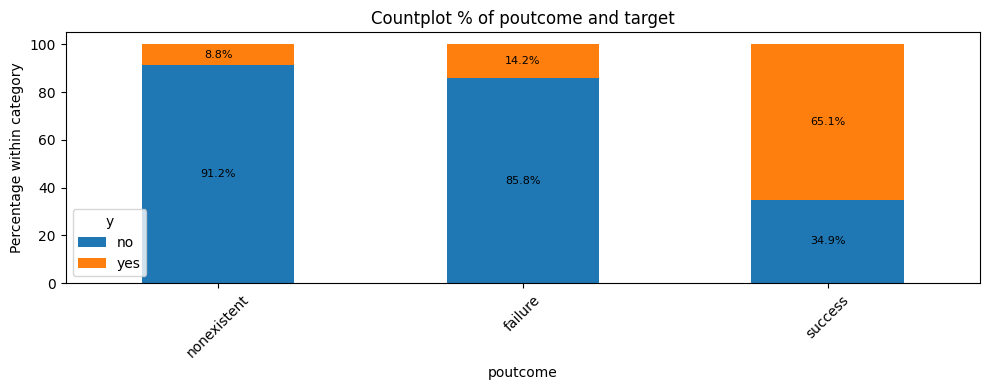

In [10]:
# Now I'll plot the percentage of target within each category.
# This way we can see how the target variable is distributed within each category of the categorical variables
# Helps to idetify if the target variable is imbalanced also in every column
for col in categorical_vars:
    count_data = pd.crosstab(df[col], df['y'])
    count_data = count_data.loc[df[col].value_counts().index]
    count_data_percent_within_bar = count_data.div(count_data.sum(axis=1), axis=0) * 100
    total_percent = count_data.sum(axis=1) / len(df) * 100

    # Plot de barras apiladas
    ax = count_data_percent_within_bar.plot(
        kind='bar',
        stacked=True,
        figsize=(10, 4)
    )

    # Etiquetas internas: % dentro de cada barra
    for container in ax.containers:
        labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
        ax.bar_label(container, labels=labels, label_type='center', fontsize=8)

    plt.title(f'Countplot % of {col} and target')
    plt.ylabel('Percentage within category')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(title='y', loc='lower left')
    plt.tight_layout()
    plt.savefig(f'plots/visualEDA/CAT_target_percentage_{col}.png')
    plt.show()

early findings:

- students and retired have a higher rate of subscribing
- If last outcome was success, it has a higher rate of subscribing
- october, september, march and december have a significant higher rate of subscribing.

- there are columns with really little info in some categories


In [11]:
df['education'].value_counts() * 100 / df.shape[0]

education
university.degree      29.541480
high.school            23.100835
basic.9y               14.680882
professional.course    12.725860
basic.4y               10.141830
basic.6y                5.563921
unknown                 4.201477
illiterate              0.043715
Name: count, dtype: float64

In [12]:
df[df['education'] == 'illiterate']['y'].value_counts()

y
no     14
yes     4
Name: count, dtype: int64

Only 18 education = illiterate

In [13]:
df[df['education'] == 'illiterate']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
5393,45,blue-collar,married,illiterate,unknown,no,yes,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6928,45,blue-collar,married,illiterate,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
12383,51,admin.,married,illiterate,unknown,no,no,cellular,jul,mon,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
14445,55,blue-collar,married,illiterate,no,yes,no,cellular,jul,tue,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
14486,55,blue-collar,married,illiterate,no,no,no,cellular,jul,tue,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
16269,60,housemaid,married,illiterate,unknown,yes,no,cellular,jul,tue,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
17739,54,blue-collar,married,illiterate,unknown,yes,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
22402,45,blue-collar,married,illiterate,no,yes,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
22642,44,blue-collar,married,illiterate,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
26680,34,self-employed,married,illiterate,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no


I'll leave it there for now as it at least has some variability in target

In [14]:
df['default'].value_counts() * 100 / df.shape[0]

default
no         79.116476
unknown    20.876239
yes         0.007286
Name: count, dtype: float64

In [15]:
df[df['default'] == 'yes']['y'].value_counts()


y
no    3
Name: count, dtype: int64

default = yes represents no data and all of them have no in target

In [16]:
df[df['default'] == 'yes']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


In [17]:
# Delete 'default' ? 'yes' as it represents like 0.007% of the data and they are all 'no' in target variable
df = df[df['default'] != 'yes']
df.shape

(41173, 21)

In [18]:
# txt shows missing values are represented as 'unknown'
print("\n'unknown' per variable:")
unknown_counts = (df == 'unknown').sum()

unknown_counts[unknown_counts > 0]


'unknown' per variable:


job           330
marital        80
education    1730
default      8596
housing       990
loan          990
dtype: int64

housing and loan have maybe coincidently same amount of NA values, I'll dig deeper into it

In [19]:
df[(df['housing'] == 'unknown') & (df['loan'] == 'unknown')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,no,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,university.degree,no,unknown,unknown,cellular,oct,tue,...,1,3,1,success,-1.1,94.601,-49.5,1.008,4963.6,yes
41014,31,technician,single,professional.course,no,unknown,unknown,cellular,oct,thu,...,2,999,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,yes
41015,34,admin.,divorced,university.degree,no,unknown,unknown,cellular,oct,thu,...,2,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,no
41029,46,management,married,university.degree,no,unknown,unknown,cellular,oct,mon,...,2,12,2,failure,-1.1,94.601,-49.5,1.032,4963.6,no


In [20]:
# proportion of target variable in rows with both unknown
df[(df['housing'] == 'unknown') & (df['loan'] == 'unknown')]['y'].value_counts(normalize=True)

y
no     0.891919
yes    0.108081
Name: proportion, dtype: float64

In [21]:
# proportion of target variable over complete dataset
df['y'].value_counts(normalize=True)

y
no     0.887329
yes    0.112671
Name: proportion, dtype: float64

same unknown rows in 'housing' and 'loan'. Proportion is practically identical to the rest of the dataset so it suggest it isn't biased. I'll delete these rows as they show a perfect dependency from each other and only represent 2.4% of total data

In [22]:
df = df[~((df['housing'] == 'unknown') & (df['loan'] == 'unknown'))]
df.shape

(40183, 21)

In [23]:
# txt shows missing values are represented as 'unknown'
print("\n'unknown' per variable:")
unknown_counts = (df == 'unknown').sum()

unknown_counts[unknown_counts > 0]


'unknown' per variable:


job           325
marital        79
education    1690
default      8369
dtype: int64

rest of NA values stay pretty similar after this decision

In [24]:
df[df['marital'] == 'unknown']['y'].value_counts(normalize=True)

y
no     0.848101
yes    0.151899
Name: proportion, dtype: float64

In [25]:
df['marital'].value_counts()

marital
married     24330
single      11284
divorced     4490
unknown        79
Name: count, dtype: int64

I'll also delete 'marital' NA values as it oly represents 0.2% from the dataset. Also, this variable is really relevant from a social standpoint and its proportion with the target variable is also similar to the whole dataset 

In [26]:
df = df[df['marital'] != 'unknown']

In [27]:
# txt shows missing values are represented as 'unknown'
print("\n'unknown' per variable:")
unknown_counts = (df == 'unknown').sum()

unknown_counts[unknown_counts > 0]


'unknown' per variable:


job           316
education    1681
default      8358
dtype: int64

I got the feeling job and education might be related, just from a logical standpoing. I decided to watch Cramer's V to take action from there.

reminder: default stays like that because it only has "unknown" and "no"

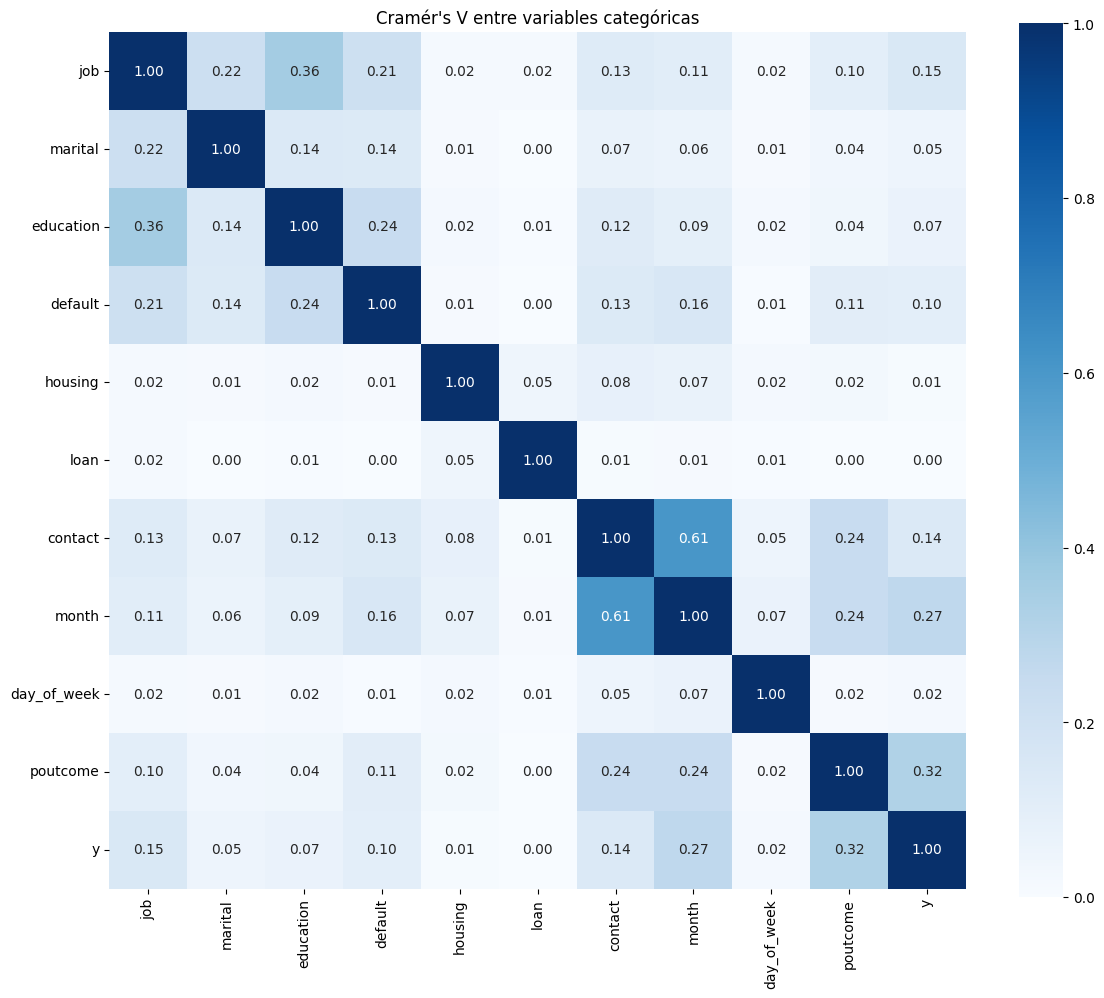

In [28]:
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt


# Function to calculate Cramér's V (from a college assignment)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Bias correction
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


cramers_matrix = pd.DataFrame(index=categorical_vars + ['y'], columns=categorical_vars + ['y'])

for col1 in categorical_vars + ['y']:
    for col2 in categorical_vars + ['y']:
        if col1 == col2:
            cramers_matrix.loc[col1, col2] = 1.0
        else:
            cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_matrix = cramers_matrix.astype(float)

plt.figure(figsize=(12, 10))
sns.heatmap(cramers_matrix, annot=True, fmt='.2f', cmap='Blues', square=True)
plt.title("Cramér's V entre variables categóricas")
plt.tight_layout()
plt.show()

Looks like job has relation with 'marital' and 'education'. maybe I can fill based on those

In [29]:
df[df['job'] == 'unknown']['education'].value_counts(normalize=True)

education
unknown                0.392405
basic.4y               0.164557
university.degree      0.123418
high.school            0.117089
basic.9y               0.094937
basic.6y               0.069620
professional.course    0.037975
Name: proportion, dtype: float64

In [30]:
df[df['job'] == 'unknown']['marital'].value_counts(normalize=True)

marital
married     0.727848
single      0.231013
divorced    0.041139
Name: proportion, dtype: float64

In [31]:
# Ill just fill by mode group: education and marital status
job_mode_by_group = df[df['job'] != 'unknown'].groupby(
    ['education', 'marital']
)['job'].agg(lambda x: x.mode()[0])

In [32]:
mask = df['job'] == 'unknown'
df.loc[mask, 'job'] = df.loc[mask].apply(
    lambda row: job_mode_by_group.get((row['education'], row['marital']), 'admin.'),
    axis=1
)

In [33]:
# txt shows missing values are represented as 'unknown'
print("\n'unknown' per variable:")
unknown_counts = (df == 'unknown').sum()

unknown_counts[unknown_counts > 0]


'unknown' per variable:


education    1681
default      8358
dtype: int64

Let's finish with education. It has a great relation with job and now that its filled i can do something similar with it. default is also a good relation but I don't understand the unknown value so I won't include it

In [34]:
df['education'].value_counts()

education
university.degree      11856
high.school             9277
basic.9y                5886
professional.course     5107
basic.4y                4054
basic.6y                2225
unknown                 1681
illiterate                18
Name: count, dtype: int64

In [35]:
df[df['education'] == 'unknown']['job'].value_counts(normalize=True)

job
blue-collar      0.328376
admin.           0.145152
technician       0.121356
student          0.104700
services         0.086853
management       0.072576
retired          0.055324
entrepreneur     0.033908
housemaid        0.024390
self-employed    0.016062
unemployed       0.011303
Name: proportion, dtype: float64

too much variance and noise with 'job'. really hard to justify how to fill the NA values... Maybe if I group job as employed/unemployed, etc I'll find something better.

In [36]:
employment_mapping = {
    'admin.': 'employed',
    'blue-collar': 'employed',
    'entrepreneur': 'self-employed',
    'housemaid': 'employed',
    'management': 'employed',
    'retired': 'retired',
    'self-employed': 'self-employed',
    'services': 'employed',
    'student': 'student',
    'technician': 'employed',
    'unemployed': 'unemployed',
    'unknown': 'unknown'
}

In [37]:
df['employment_status'] = df['job'].map(employment_mapping)

In [38]:
df['employment_status'].value_counts()

employment_status
employed         33797
self-employed     2793
retired           1669
unemployed         981
student            864
Name: count, dtype: int64

In [39]:
df[df['education'] == 'unknown']['employment_status'].value_counts(normalize=True)

employment_status
employed         0.778703
student          0.104700
retired          0.055324
self-employed    0.049970
unemployed       0.011303
Name: proportion, dtype: float64

So 77% of unknown'education' are marked as employed, second place and on are 10% or below.

In [40]:
## Fill missing education values by employment status
education_mode_by_status = df[
    (df['education'] != 'unknown')
].groupby('employment_status')['education'].agg(lambda x: x.mode()[0])

print(education_mode_by_status)

employment_status
employed         university.degree
retired                   basic.4y
self-employed    university.degree
student                high.school
unemployed       university.degree
Name: education, dtype: object


In [41]:
mask = df['education'] == 'unknown'
df.loc[mask, 'education'] = df[mask].apply(
    lambda row: education_mode_by_status[row['employment_status']]
    if row['employment_status'] in education_mode_by_status else 'unknown',
    axis=1
)

In [42]:
# txt shows missing values are represented as 'unknown'
print("\n'unknown' per variable:")
unknown_counts = (df == 'unknown').sum()

unknown_counts[unknown_counts > 0]


'unknown' per variable:


default    8358
dtype: int64

And that's it for NA values... This dataset only has missing values in categorical columns so I will just take a look to the numeric to start modeling

## Numeric

In [43]:
# decode target variable to be able to watch correlations with rest of the dataset
df['decoded_target'] = df[target_var].map({'yes': 1, 'no': 0})

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

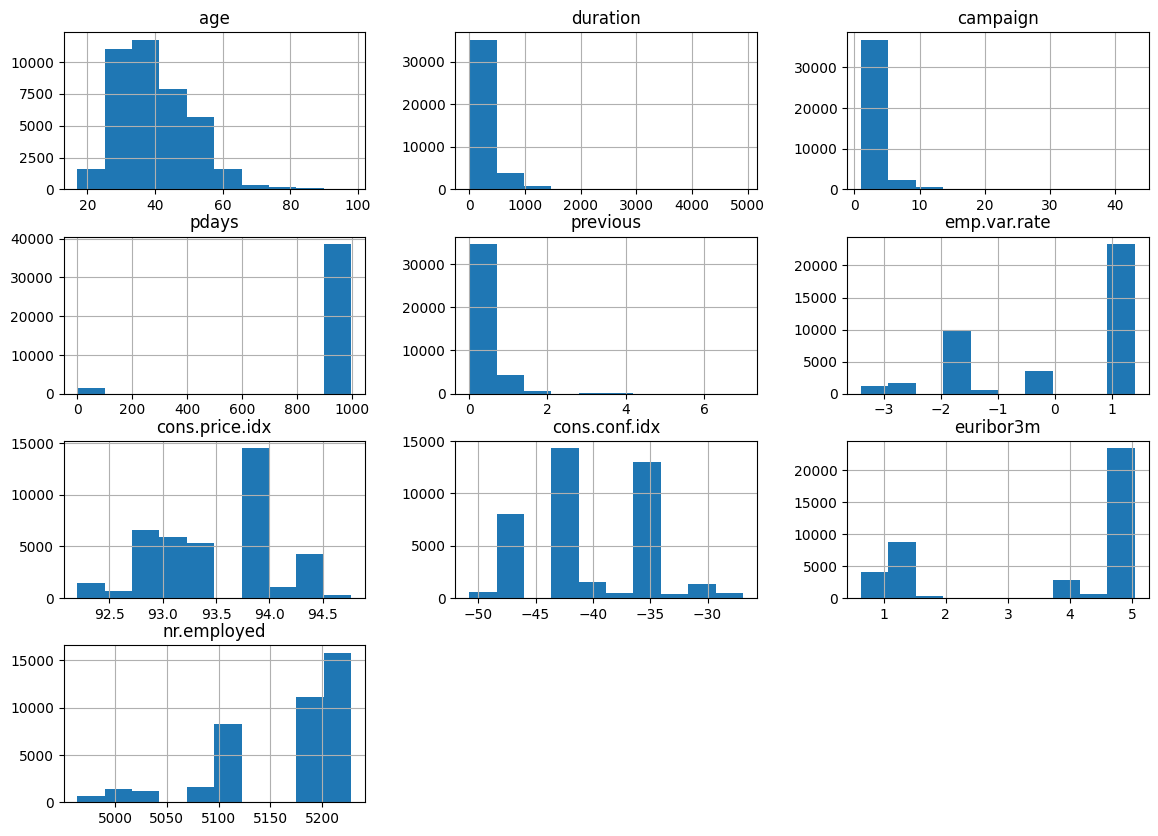

In [44]:
# distribution
df[numeric_vars].describe()
df[numeric_vars].hist(figsize=(14, 10))

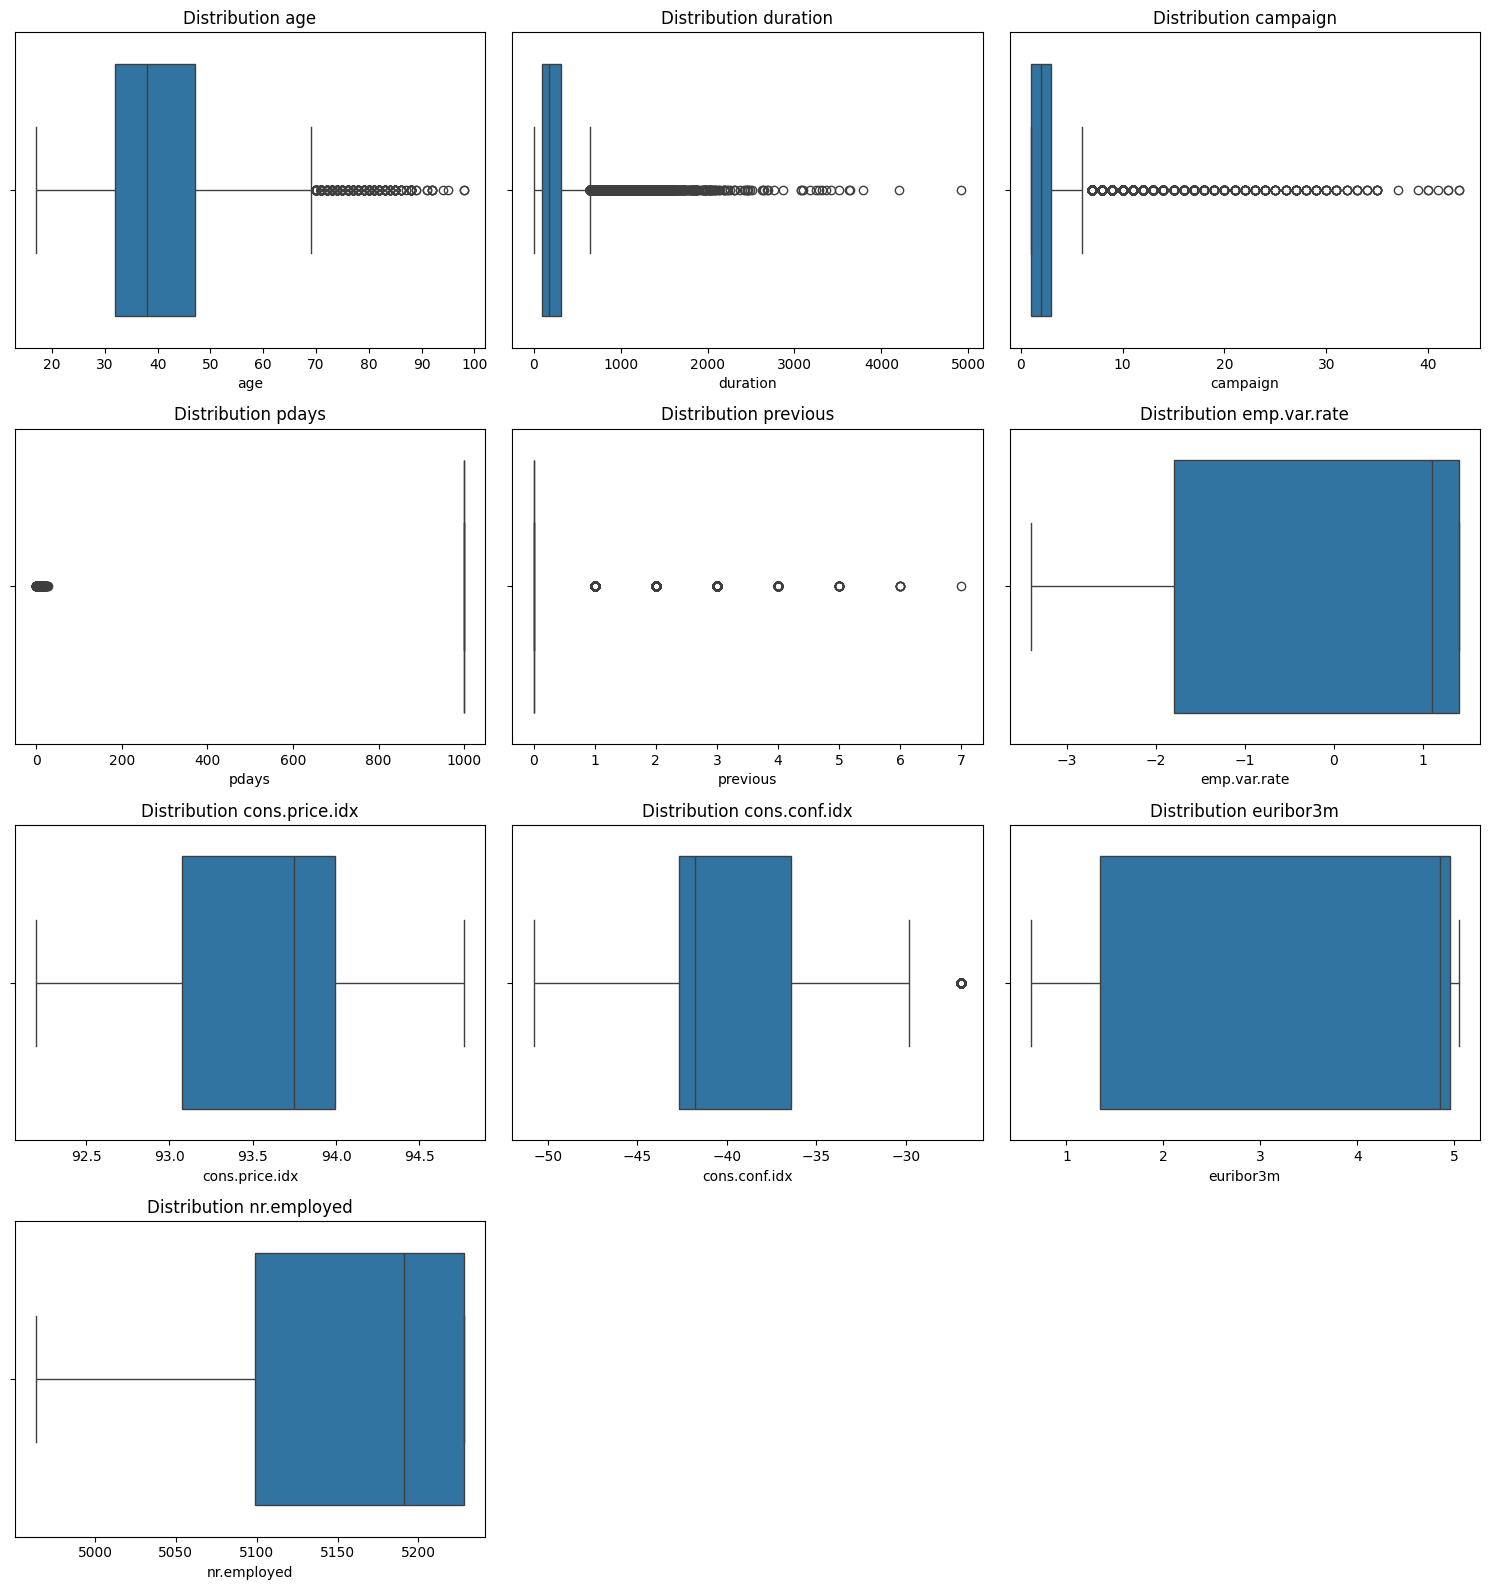

In [45]:
# to try detect outliers
import math

n_cols = 3
n_vars = len(numeric_vars)
n_rows = math.ceil(n_vars / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_vars):
    sns.boxplot(data=df, x=col,ax=axes[i])
    axes[i].set_title(f'Distribution {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('plots/visualEDA/NUM_boxplots.png')
plt.show()

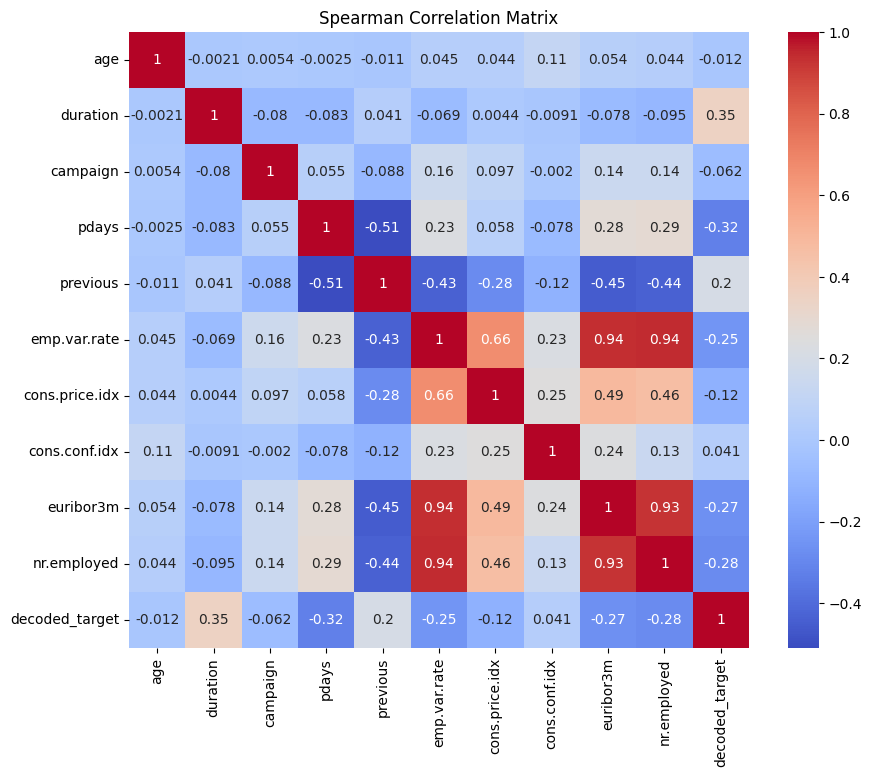

In [46]:
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_vars + ['decoded_target']].corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Spearman Correlation Matrix")
plt.savefig('plots/visualEDA/SPEARMAN_corr_matrix.png')

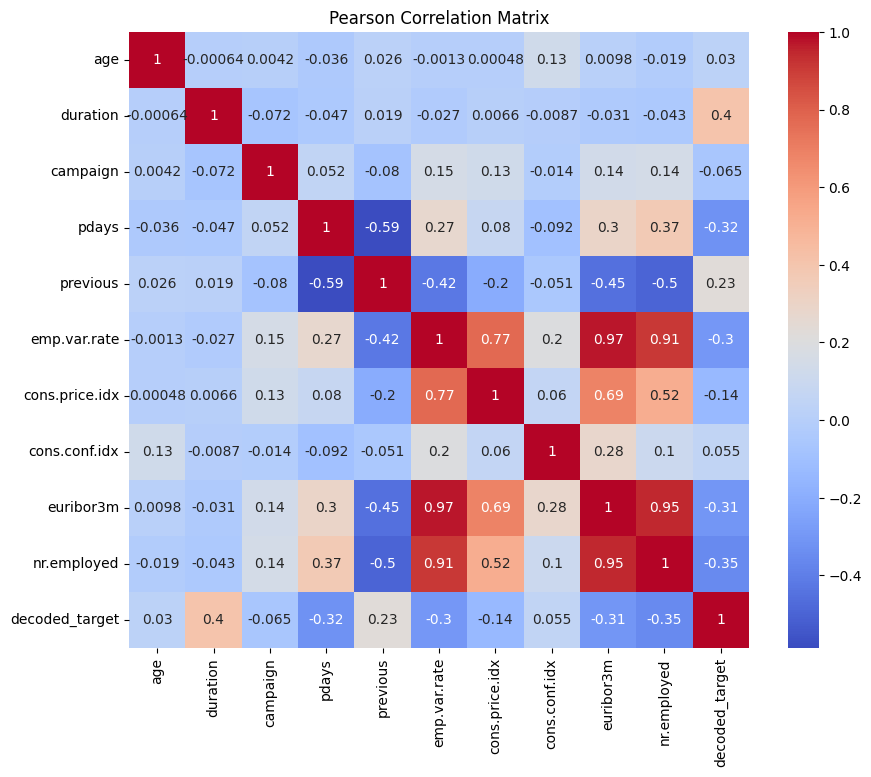

In [47]:
# Correlation matrix for numeric variables
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_vars + ['decoded_target']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation Matrix")
plt.savefig('plots/visualEDA/PEARSON_corr_matrix.png')

age, campaign, cons.conf.idx, cons.price.idx don't represent much correlation but I'll check for non-linear


/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vec

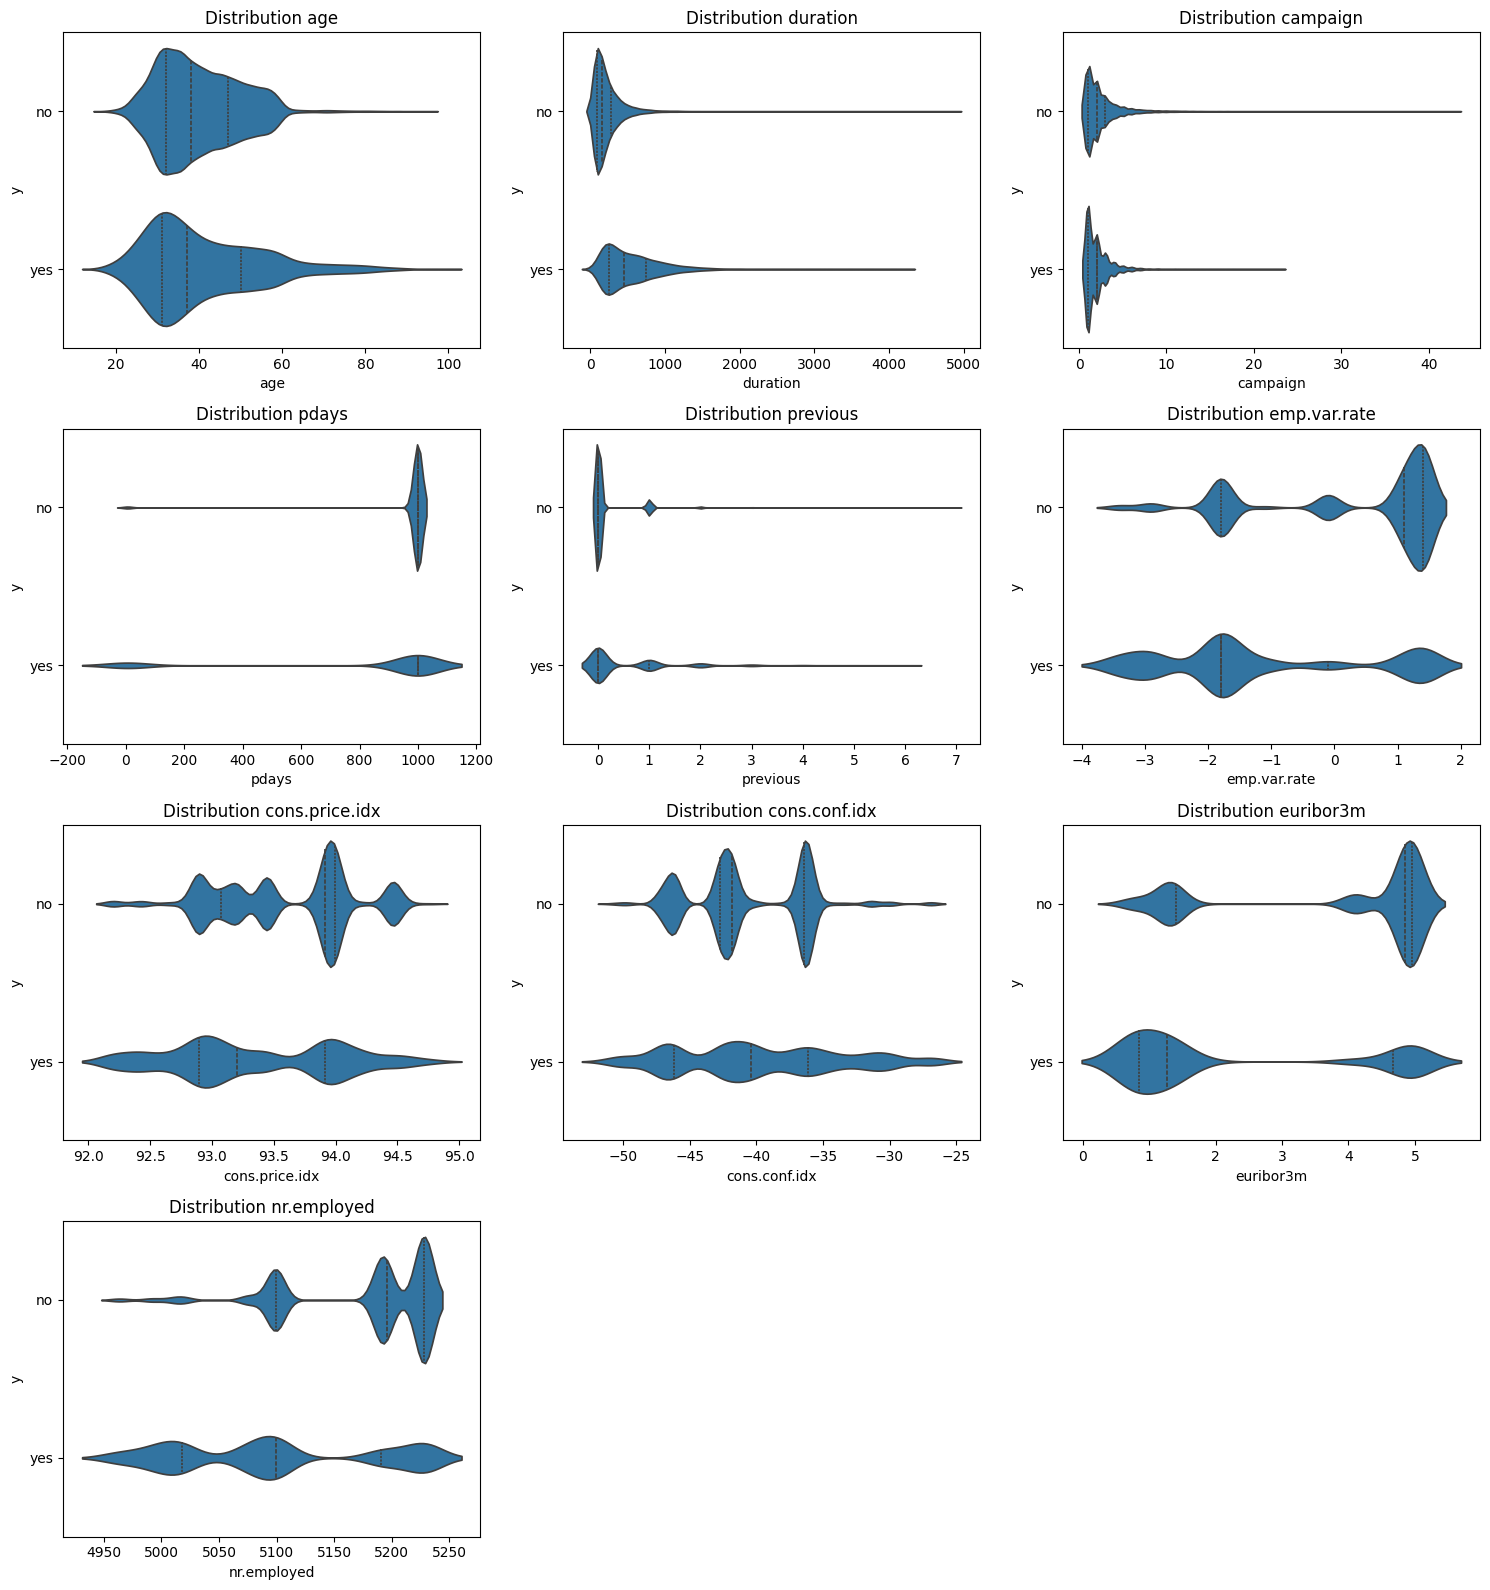

<Figure size 640x480 with 0 Axes>

In [48]:
# to try detect outliers
import math

n_cols = 3
n_vars = len(numeric_vars)
n_rows = math.ceil(n_vars / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_vars):
    sns.violinplot(data=df, x=col,y='y', ax=axes[i], inner='quartile')
    axes[i].set_title(f'Distribution {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
plt.savefig('plots/visualEDA/NUM_violinplots.png')

I'll go check:

pdays: -0.32

euribor3m: -0.31

nr.employed: -0.35

emp.var.rate: -0.30

previous: 0.23

pdays shows number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).

96% of datat is as 999, which means this actualy is a pseudo.categorical variable.

In [49]:
df[df['pdays']==999]['y'].value_counts(normalize=True)

y
no     0.907295
yes    0.092705
Name: proportion, dtype: float64

In [50]:
df[df['pdays']!=999]['y'].value_counts(normalize=True)

y
yes    0.636179
no     0.363821
Name: proportion, dtype: float64

If there was previous contact, there is a significant higher chance of success. Only 9.3% first-try. I'll turn this into a categorical variable.

In [51]:
df['pdays_was_contacted'] = (df['pdays'] != 999).astype(int)

In [52]:
df['previous'].value_counts()

previous
0    34637
1     4436
2      732
3      209
4       66
5       18
6        5
7        1
Name: count, dtype: int64

previous shows variance for target and looks as a discrete column. maybe categorical. For simplicity, I'll change it to binary had_previous_contact

In [53]:
df['had_previous_contact'] = (df['previous'] != 0).astype(int)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,employment_status,decoded_target,pdays_was_contacted,had_previous_contact
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,employed,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,employed,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,employed,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,employed,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,employed,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,yes,retired,1,0,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,no,employed,0,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,no,retired,0,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,yes,employed,1,0,0


In [54]:
df[df['had_previous_contact'] == 0]['y'].value_counts(normalize=True)

y
no     0.911395
yes    0.088605
Name: proportion, dtype: float64

In [55]:
df[df['had_previous_contact'] == 1]['y'].value_counts(normalize=True)

y
no     0.734589
yes    0.265411
Name: proportion, dtype: float64

It significantly increases success rate for previous contact

pday_was_contacted y had_previous_contact aren't redundant as pday_was_contacted measures contact just for this campaign but had_previous_contact also takes into account previous campaigns. That being said, I think I can create a combined based on these 2

In [56]:
def classify_contact_type(row):
    if row['pdays'] == 999 and row['previous'] == 0:
        return 0
    elif row['pdays'] == 999 and row['previous'] > 0:
        return 1
    else:
        return 2

df['contact_type'] = df.apply(classify_contact_type, axis=1)

In [57]:
df[df['contact_type'] == 0]['y'].value_counts(normalize=True)

y
no     0.911395
yes    0.088605
Name: proportion, dtype: float64

In [58]:
df[df['contact_type'] == 1]['y'].value_counts(normalize=True)

y
no     0.871711
yes    0.128289
Name: proportion, dtype: float64

In [59]:
df[df['contact_type'] == 2]['y'].value_counts(normalize=True)

y
yes    0.636179
no     0.363821
Name: proportion, dtype: float64

# Choosing features

In [60]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'employment_status',
       'decoded_target', 'pdays_was_contacted', 'had_previous_contact',
       'contact_type'],
      dtype='object')

In [61]:
categorical_vars = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'poutcome',
    'employment_status',
    'pdays_was_contacted',
    'had_previous_contact',
    'contact_type'
]

numeric_vars = [
    'age',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'
]

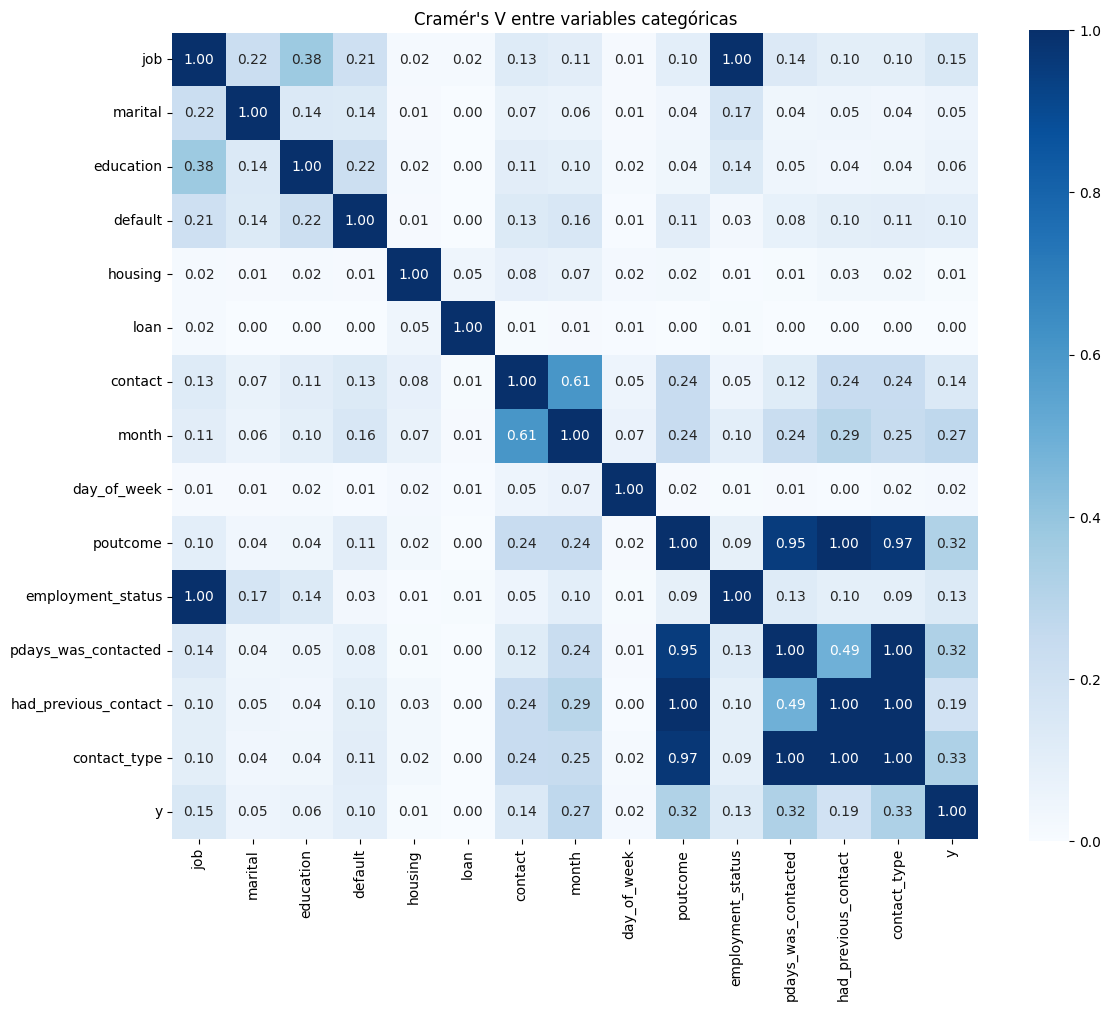

In [62]:
# Cramers V matrix lets mee see the strength of association between categorical variables

cramers_matrix = pd.DataFrame(index=categorical_vars + ['y'], columns=categorical_vars + ['y'])

for col1 in categorical_vars + ['y']:
    for col2 in categorical_vars + ['y']:
        if col1 == col2:
            cramers_matrix.loc[col1, col2] = 1.0
        else:
            cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_matrix = cramers_matrix.astype(float)

plt.figure(figsize=(12, 10))
sns.heatmap(cramers_matrix, annot=True, fmt='.2f', cmap='Blues', square=True)
plt.title("Cramér's V entre variables categóricas")
plt.tight_layout()
plt.savefig('plots/features/CramersV_categorical_vars.png')
plt.show()

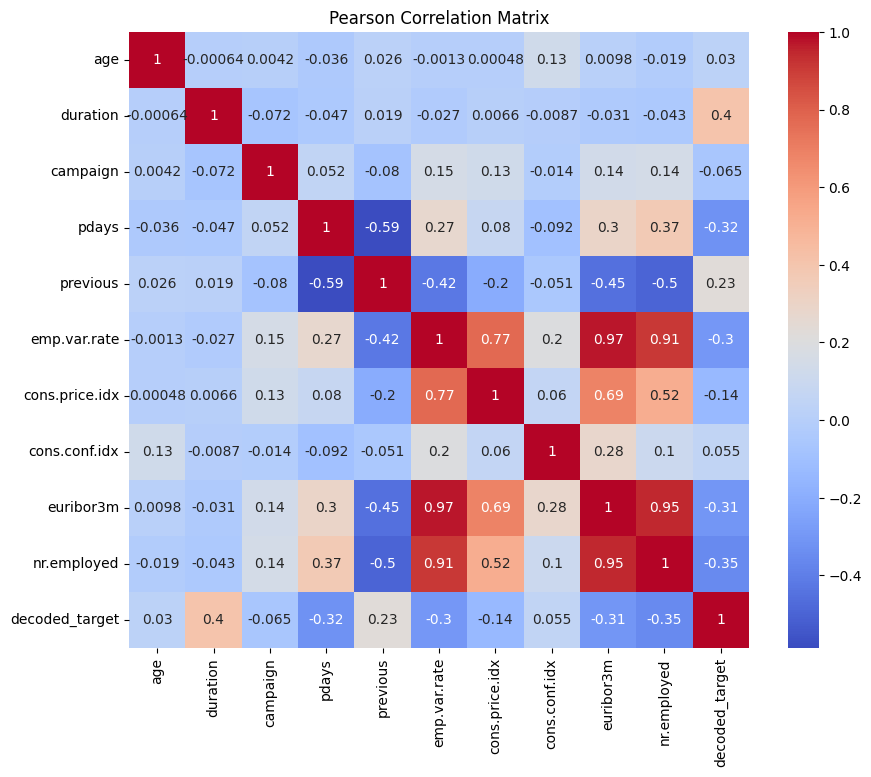

In [63]:
# Correlation matrix for numeric variables
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_vars + ['decoded_target']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation Matrix")
plt.savefig('plots/features/PEARSON_corr_matrix.png')

I think I have enough data to decide which variables stay as features... Based on EDA and correlation matrixes

In [64]:
# df_encoded = pd.get_dummies(df, columns=['job', 'employment_status', 'marital', 'education','month','day_of_week','poutcome','default'], drop_first=False)
df_encoded = pd.get_dummies(df, columns=['job','month','poutcome','default'], drop_first=False)

In [65]:
# df_encoded['housing'] = df_encoded['housing'].map({'no': 0, 'yes': 1})
# df_encoded['loan'] = df_encoded['loan'].map({'no': 0, 'yes': 1})
df_encoded['contact'] = df_encoded['contact'].map({'telephone': 0, 'cellular': 1})

In [66]:
df_encoded.drop(columns=['had_previous_contact', 'previous'], inplace=True)

In [67]:
df_encoded.drop(columns=['employment_status', 'education', 'marital', 'day_of_week','housing','loan','y'], inplace=True)

In [68]:
df_encoded.drop(columns=['age', 'duration', 'campaign', 'emp.var.rate','cons.price.idx','euribor3m','pdays'], inplace=True)

In [69]:
# Dataset that will be used for modeling
df_encoded

,contact,cons.conf.idx,nr.employed,decoded_target,pdays_was_contacted,contact_type,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,default_no,default_unknown
0,0,-36.4,5191.0,0,0,0,False,False,False,True,...,False,True,False,False,False,False,True,False,True,False
1,0,-36.4,5191.0,0,0,0,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,0,-36.4,5191.0,0,0,0,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
3,0,-36.4,5191.0,0,0,0,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
4,0,-36.4,5191.0,0,0,0,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,-50.8,4963.6,1,0,0,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
41184,1,-50.8,4963.6,0,0,0,False,True,False,False,...,False,False,True,False,False,False,True,False,True,False
41185,1,-50.8,4963.6,0,0,0,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
41186,1,-50.8,4963.6,1,0,0,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False


In [70]:
# Features and target variable
features = list(df_encoded.drop(columns=['decoded_target']).columns)
target = 'decoded_target'

In [71]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40104 entries, 0 to 41187
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   contact               40104 non-null  int64  
 1   cons.conf.idx         40104 non-null  float64
 2   nr.employed           40104 non-null  float64
 3   decoded_target        40104 non-null  int64  
 4   pdays_was_contacted   40104 non-null  int64  
 5   contact_type          40104 non-null  int64  
 6   job_admin.            40104 non-null  bool   
 7   job_blue-collar       40104 non-null  bool   
 8   job_entrepreneur      40104 non-null  bool   
 9   job_housemaid         40104 non-null  bool   
 10  job_management        40104 non-null  bool   
 11  job_retired           40104 non-null  bool   
 12  job_self-employed     40104 non-null  bool   
 13  job_services          40104 non-null  bool   
 14  job_student           40104 non-null  bool   
 15  job_technician        40

# Building and evaluation models

## Train and Test set

In [72]:
# Separate Dataset and Normalize numeric features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded[features]
y = df_encoded[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify=y, random_state=42)

In [73]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0)
selector.fit(X_scaled)  # Check for var = 0

,threshold,0.0


In [74]:
X_df = pd.DataFrame(X_scaled, columns=features)
corr_matrix = X_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.999)]
print(f"{to_drop} Highly correlated columns")

['default_unknown'] Highly correlated columns


In [75]:
df_encoded.drop(columns=['default_unknown'], inplace=True)

I'll need to drop default_unknown. It is binary and applied one hot. I shouldn't have done that

In [76]:
# Separate Dataset and Normalize numeric features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = list(df_encoded.drop(columns=['decoded_target']).columns)
X = df_encoded[features]
y = df_encoded[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify=y, random_state=42)

### Checkpoint

In [77]:
# df_encoded.to_csv('dataset/bank_to_build.csv', index=False)

In [78]:
# df_encoded = pd.read_csv('dataset/bank_to_build.csv')
# df_encoded

## Tryout Logistic Regression

/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise 

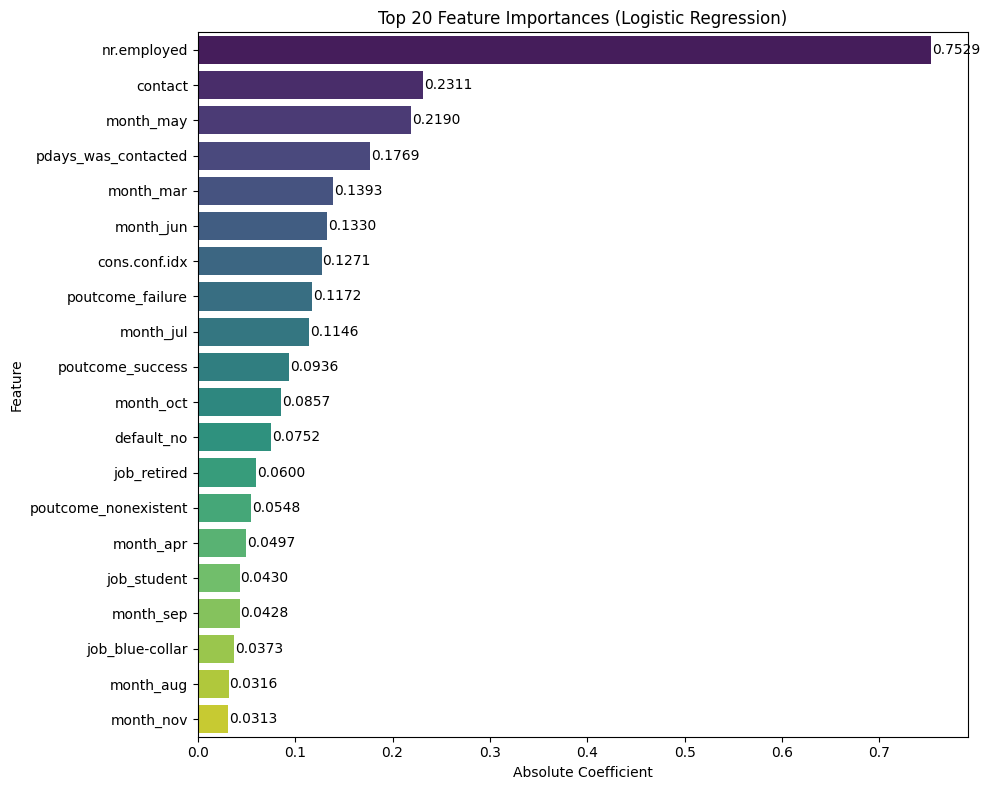

AUC Score: 0.8022


/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/utils/extma

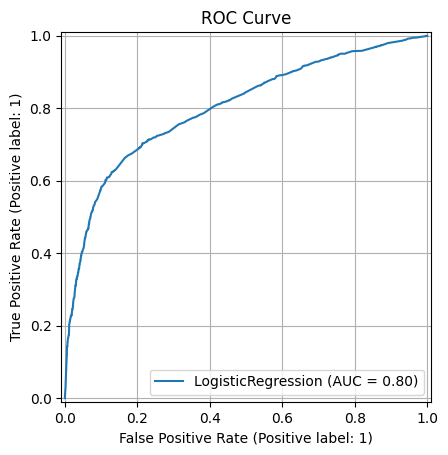

In [79]:
# I usually start with Logistic Regression as a baseline model as it is simple and interpretable
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, RocCurveDisplay

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Importance per feature graph
importance = np.abs(model.coef_[0])
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis',hue='Feature')

for i, (imp, feat) in enumerate(zip(importance_df['Importance'], importance_df['Feature'])):
    plt.text(imp + 0.001, i, f'{imp:.4f}', va='center')

plt.title('Top 20 Feature Importances (Logistic Regression)')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Predicts
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# AUC
auc_score = roc_auc_score(y_test, y_proba)

# ROC Curve
print(f"AUC Score: {auc_score:.4f}")
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.grid(True)
plt.show()

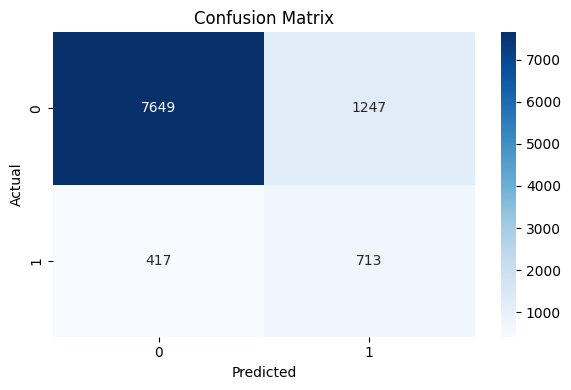

In [80]:
# CM
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Top 10% Lift: 4.427428329182343 Baseline Rate: 0.11270696189906244


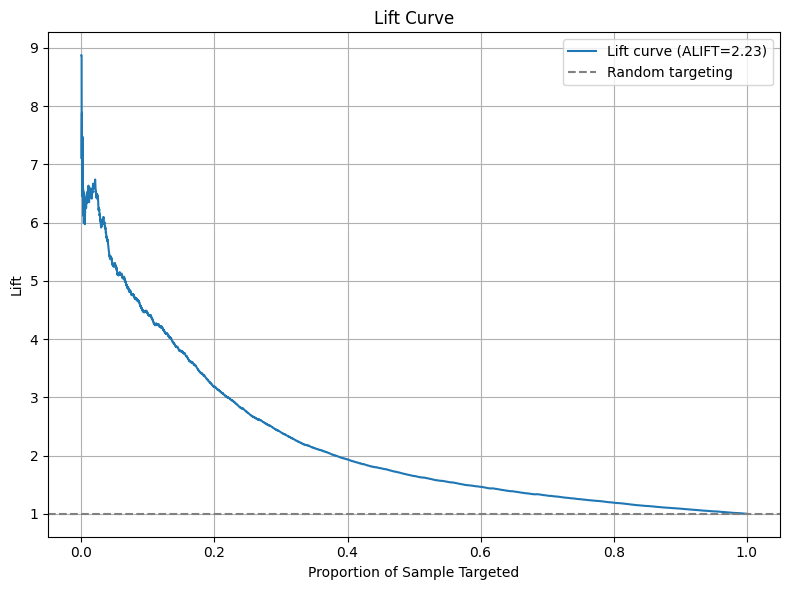

In [81]:
# define ALIFT metric plot as it is key
def plot_lift_curve(y_true, y_scores):
    data = pd.DataFrame({'y_true': y_true, 'y_score': y_scores})
    data.sort_values(by='y_score', ascending=False, inplace=True)
    data['cumulative_positives'] = data['y_true'].cumsum()
    data['n'] = range(1, len(data) + 1)
    data['lift'] = data['cumulative_positives'] / (data['n'] * data['y_true'].mean())

    alift = np.trapezoid(data['lift'], dx=1/len(data))

    plt.figure(figsize=(8, 6))
    plt.plot(data['n'] / len(data), data['lift'], label=f'Lift curve (ALIFT={alift:.2f})')
    plt.axhline(y=1, color='gray', linestyle='--', label='Random targeting')
    plt.xlabel("Proportion of Sample Targeted")
    plt.ylabel("Lift")
    plt.title("Lift Curve")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    return alift

# Lift top 10%
top_percentile = 0.10
threshold_index = int(len(y_test) * top_percentile)

# Sort by prob
sorted_indices = np.argsort(y_proba)[::-1]
top_indices = sorted_indices[:threshold_index]

# Positive rate in top 10% and global
lift_top_10 = y_test.iloc[top_indices].mean()
baseline_rate = y_test.mean()

lift_top_10_value = lift_top_10 / baseline_rate
print("Top 10% Lift:", lift_top_10_value, "Baseline Rate:", baseline_rate)

alift_score = plot_lift_curve(y_test, y_proba)


ALIFT (Area under Lift Curve): 0.7683


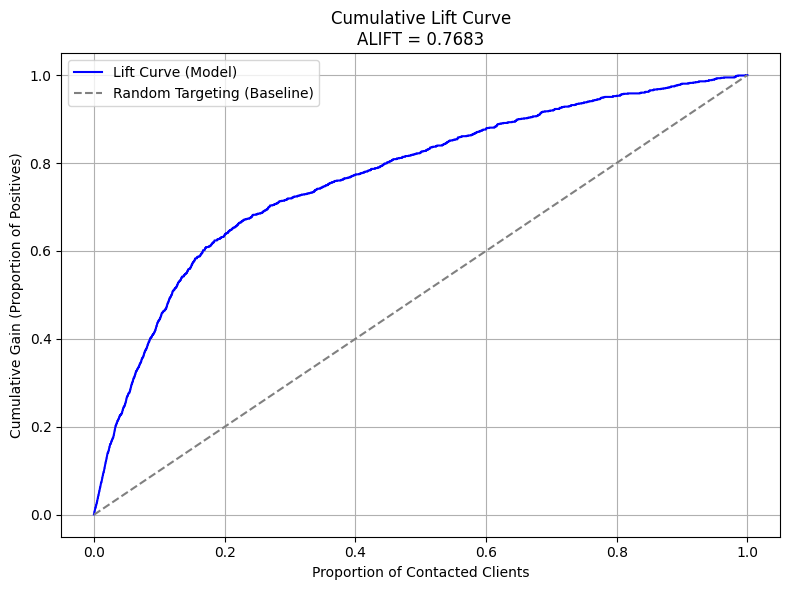

In [82]:
# Create dataframe for lift curve
lift_df = pd.DataFrame({'y_true': y_test.values, 'y_proba': y_proba})
lift_df.sort_values('y_proba', ascending=False, inplace=True)
lift_df['cum_response'] = lift_df['y_true'].cumsum()
lift_df['total_positives'] = lift_df['y_true'].sum()
lift_df['baseline'] = np.linspace(0, 1, len(lift_df))

# Normalize cumulative gain
lift_df['cum_gain'] = lift_df['cum_response'] / lift_df['total_positives']
lift_df['percent_contacted'] = np.arange(1, len(lift_df) + 1) / len(lift_df)

# Calculate ALIFT (area under lift curve)
alift = np.trapezoid(lift_df['cum_gain'], lift_df['percent_contacted'])

# Plot Lift Curve
print(f"ALIFT (Area under Lift Curve): {alift:.4f}")
plt.figure(figsize=(8, 6))
plt.plot(lift_df['percent_contacted'], lift_df['cum_gain'], label='Lift Curve (Model)', color='blue')
plt.plot(lift_df['percent_contacted'], lift_df['baseline'], label='Random Targeting (Baseline)', linestyle='--', color='gray')
plt.title(f'Cumulative Lift Curve\nALIFT = {alift:.4f}')
plt.xlabel('Proportion of Contacted Clients')
plt.ylabel('Cumulative Gain (Proportion of Positives)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Pipeline

In [83]:
# Just to be sure lol
X = df_encoded[features]
y = df_encoded[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify=y, random_state=42)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# I decided to include this models to have a variety of algorithms to compare
# Linear, bagging and boosting

models = {
    "LogReg": (LogisticRegression(max_iter=1000, class_weight='balanced'), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "RF": (RandomForestClassifier(class_weight='balanced', random_state=42), {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None]
    }),
   "HistGB": (
      HistGradientBoostingClassifier(max_iter=200,
                                     early_stopping=False,
                                     random_state=42),
      {"learning_rate": [0.01, 0.05], "max_leaf_nodes": [15, 31]}
   )
}

In [85]:
from sklearn.base import clone
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

# 10-fold stratified cross-validation. to keep class balance in each fold
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

auc_scores = {name: [] for name in models}
alift_scores = {name: [] for name in models}

def compute_alift(y_true, y_score):
    data = pd.DataFrame({'y_true': y_true, 'y_score': y_score})
    data.sort_values(by='y_score', ascending=False, inplace=True)
    data['cumulative_positives'] = data['y_true'].cumsum()
    data['n'] = range(1, len(data) + 1)
    data['lift'] = data['cumulative_positives'] / (data['n'] * data['y_true'].mean())
    return np.trapezoid(data['lift'], dx=1/len(data))

best_params = {name: [] for name in models}

for name, (model, param_grid) in tqdm(models.items()):
    for train_idx, test_idx in outer_cv.split(X_scaled, y):
        X_tr, X_te = X_scaled[train_idx], X_scaled[test_idx]
        y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

        # Perform grid search with cross-validation
        clf = GridSearchCV(estimator=clone(model), param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
        clf.fit(X_tr, y_tr)
        best_params[name].append(clf.best_params_)

        y_proba = clf.predict_proba(X_te)[:, 1]
        auc = roc_auc_score(y_te, y_proba)
        alift = compute_alift(y_te.reset_index(drop=True), y_proba)

        auc_scores[name].append(auc)
        alift_scores[name].append(alift)

  0%|          | 0/3 [00:00<?, ?it/s]/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + i

In [86]:
best_params

{'LogReg': [{'C': 10},
  {'C': 10},
  {'C': 10},
  {'C': 0.01},
  {'C': 10},
  {'C': 10},
  {'C': 10},
  {'C': 10},
  {'C': 10},
  {'C': 10}],
 'RF': [{'max_depth': 5, 'n_estimators': 200},
  {'max_depth': 5, 'n_estimators': 200},
  {'max_depth': 5, 'n_estimators': 100},
  {'max_depth': 5, 'n_estimators': 100},
  {'max_depth': 5, 'n_estimators': 100},
  {'max_depth': 5, 'n_estimators': 200},
  {'max_depth': 5, 'n_estimators': 200},
  {'max_depth': 5, 'n_estimators': 100},
  {'max_depth': 5, 'n_estimators': 200},
  {'max_depth': 5, 'n_estimators': 100}],
 'HistGB': [{'learning_rate': 0.01, 'max_leaf_nodes': 15},
  {'learning_rate': 0.05, 'max_leaf_nodes': 15},
  {'learning_rate': 0.01, 'max_leaf_nodes': 15},
  {'learning_rate': 0.05, 'max_leaf_nodes': 31},
  {'learning_rate': 0.05, 'max_leaf_nodes': 15},
  {'learning_rate': 0.01, 'max_leaf_nodes': 15},
  {'learning_rate': 0.01, 'max_leaf_nodes': 15},
  {'learning_rate': 0.01, 'max_leaf_nodes': 15},
  {'learning_rate': 0.01, 'max_leaf_no

Runtime Warnings might affect my decision for Logistic Regression, other models didn't any issue

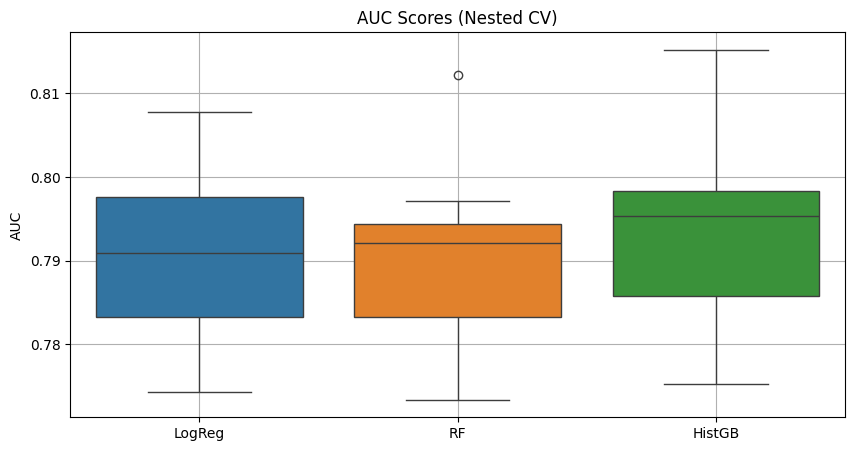

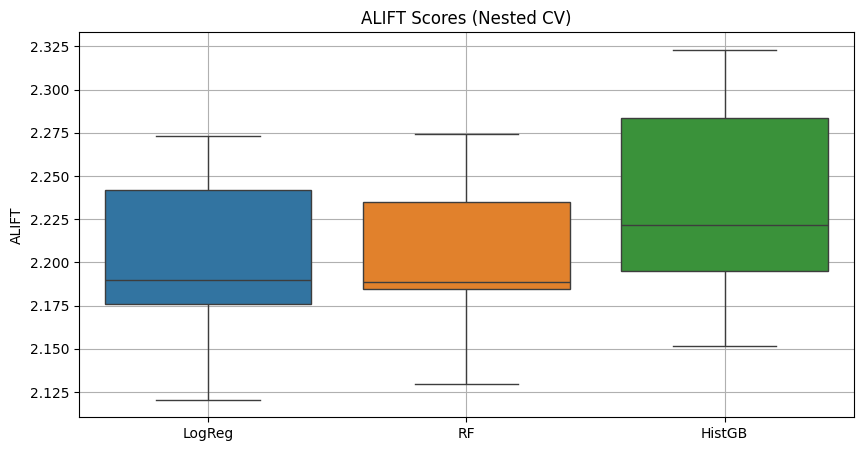

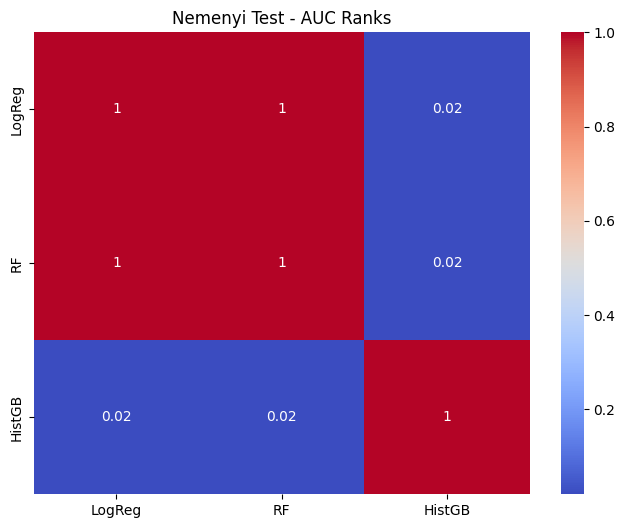

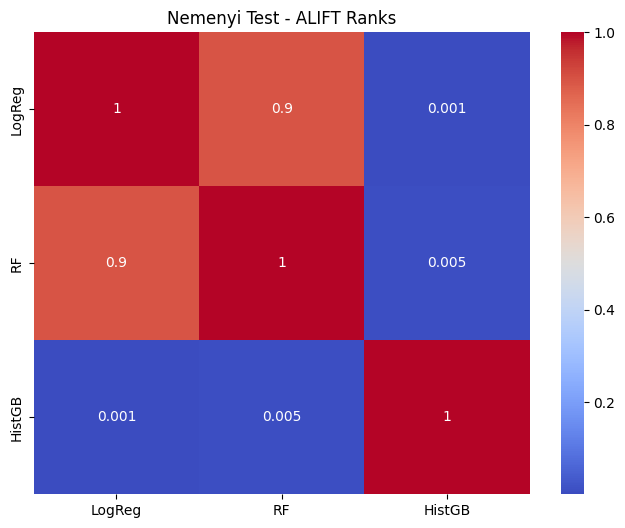

In [87]:
import scikit_posthocs as sp

# Convertir a DataFrames
auc_df = pd.DataFrame(auc_scores)
alift_df = pd.DataFrame(alift_scores)

# Boxplot AUC
plt.figure(figsize=(10, 5))
sns.boxplot(data=auc_df)
plt.title("AUC Scores (Nested CV)")
plt.ylabel("AUC")
plt.grid(True)
plt.savefig('plots/modeling/AUC_boxplot.png')
plt.show()

# Boxplot ALIFT 
plt.figure(figsize=(10, 5))
sns.boxplot(data=alift_df)
plt.title("ALIFT Scores (Nested CV)")
plt.ylabel("ALIFT")
plt.grid(True)
plt.savefig('plots/modeling/ALIFT_boxplot.png')
plt.show()

# Ranks y Heatmap para AUC
ranks_auc = auc_df.rank(ascending=False, axis=1)
nemenyi_auc = sp.posthoc_nemenyi_friedman(ranks_auc.values)

plt.figure(figsize=(8, 6))
sns.heatmap(nemenyi_auc, xticklabels=auc_df.columns, yticklabels=auc_df.columns, annot=True, cmap="coolwarm")
plt.title("Nemenyi Test - AUC Ranks")
plt.savefig('plots/modeling/Nemenyi_AUC_heatmap.png')
plt.show()

# Ranks y Heatmap para ALIFT
ranks_alift = alift_df.rank(ascending=False, axis=1)
nemenyi_alift = sp.posthoc_nemenyi_friedman(ranks_alift.values)

plt.figure(figsize=(8, 6))
sns.heatmap(nemenyi_alift, xticklabels=alift_df.columns, yticklabels=alift_df.columns, annot=True, cmap="coolwarm")
plt.title("Nemenyi Test - ALIFT Ranks")
plt.savefig('plots/modeling/Nemenyi_ALIFT_heatmap.png') 
plt.show()

Looks like there is a clear winner with HistGB. Maybe not a surprise


Performance Summary (Mean ± Std):
        AUC Mean  AUC Std  ALIFT Mean  ALIFT Std
LogReg    0.7900   0.0109      2.1991     0.0493
RF        0.7904   0.0111      2.2001     0.0458
HistGB    0.7934   0.0116      2.2331     0.0594

Most Common Hyperparameters:
LogReg: {'C': 10} (9 times)
RF: {'max_depth': 5, 'n_estimators': 200} (5 times)
HistGB: {'learning_rate': 0.01, 'max_leaf_nodes': 15} (7 times)


/opt/anaconda3/envs/banorteCT/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/jr/p6t64zgx4vl7wjpd7bxr18fc0000gn/T/ipykernel_30939/3180904324.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_ranks['Average Rank'], y=mean_ranks.index, palette='viridis')


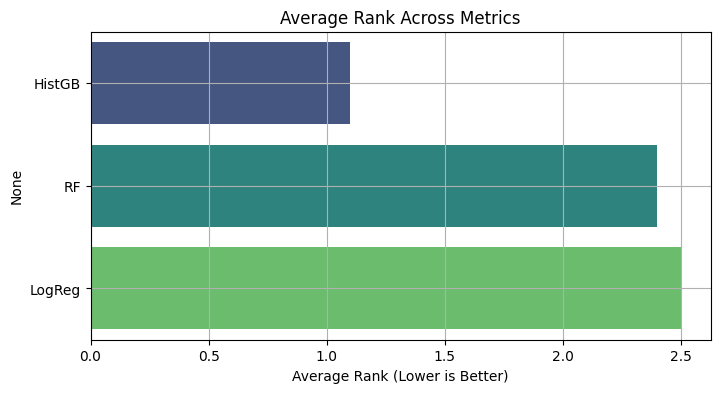

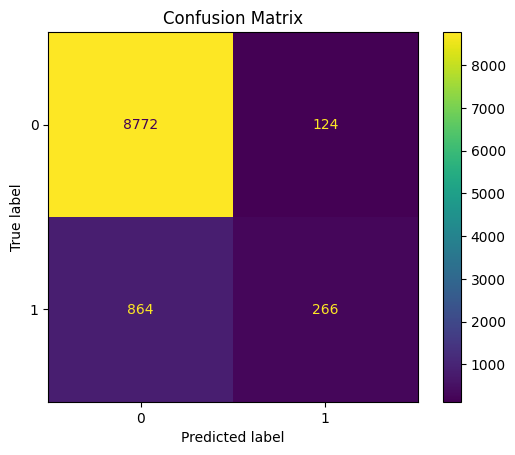

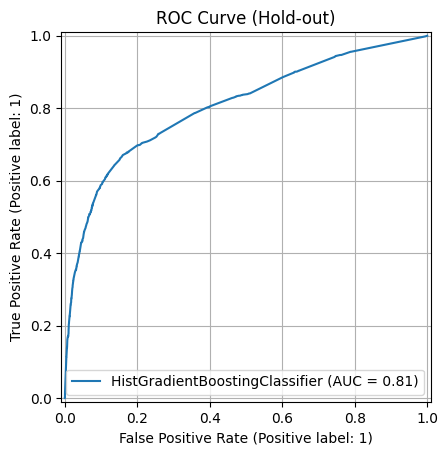

Top 10% Lift: 4.631090032324731 Baseline Rate: 0.11270696189906244
AUC Score: 0.8058
ALIFT (Area under Lift Curve): 0.7714


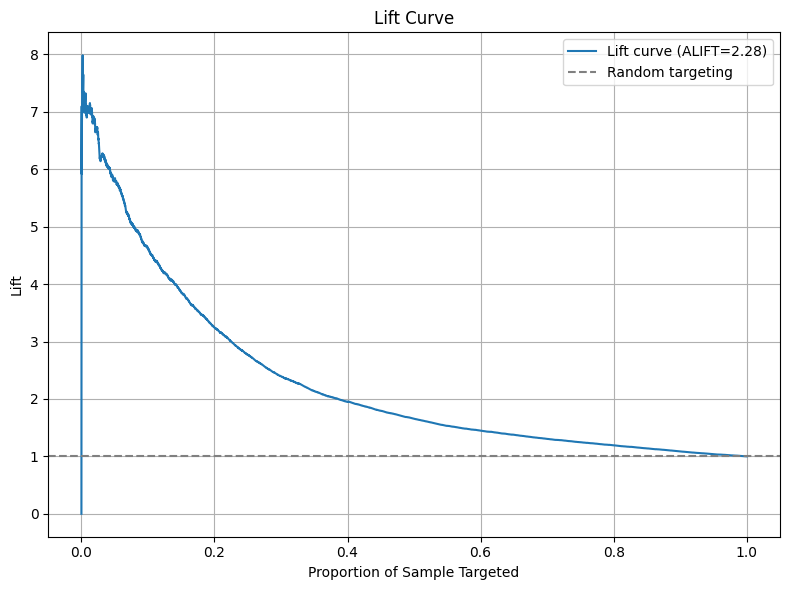

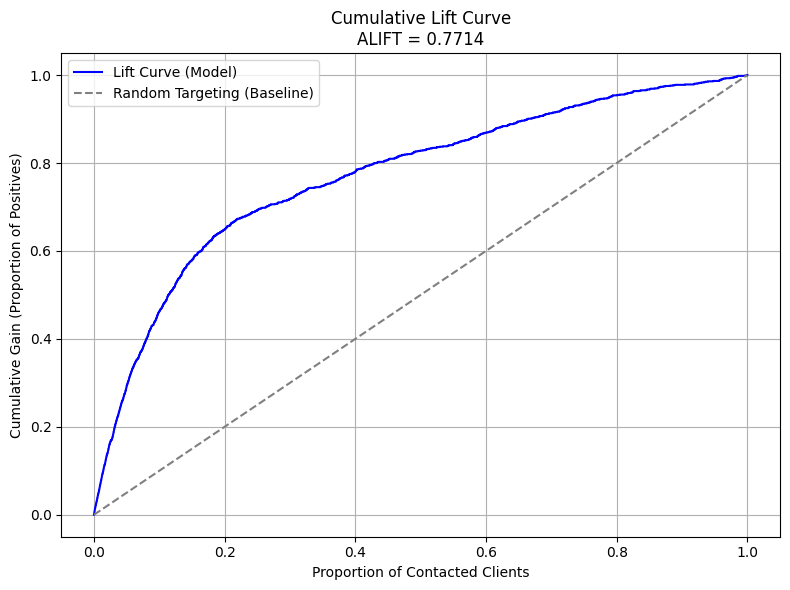

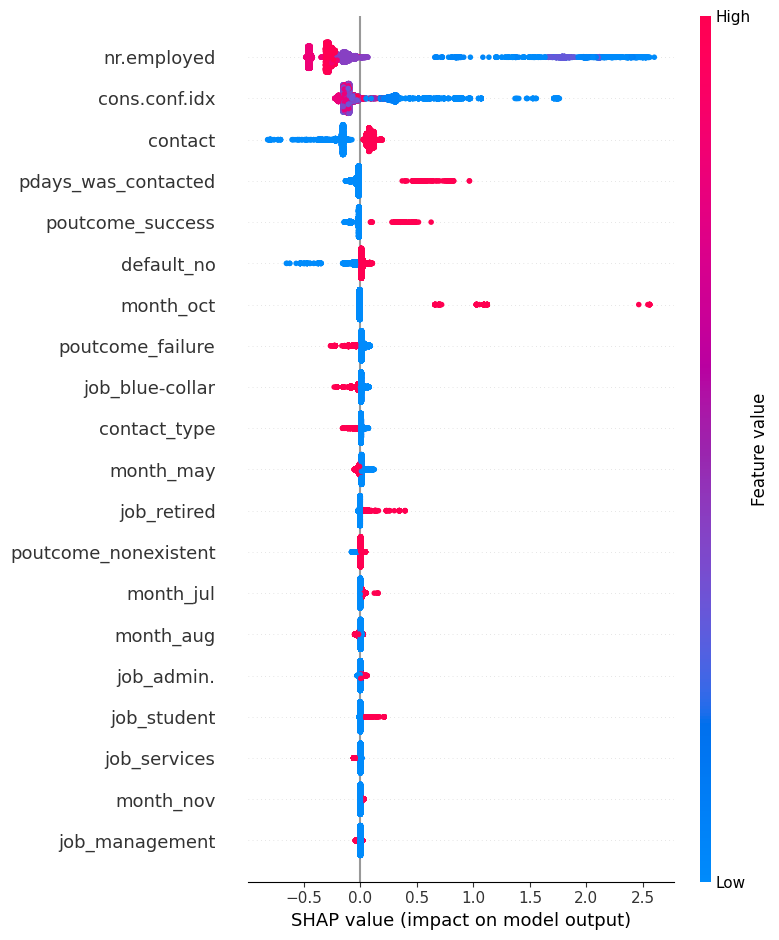

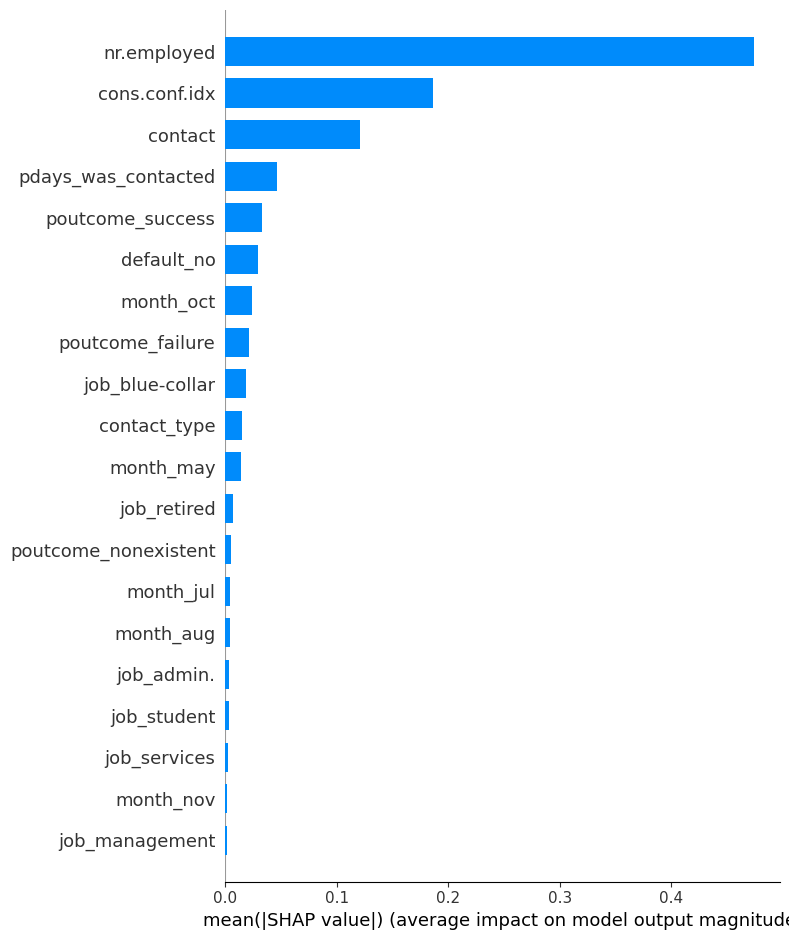

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from collections import Counter
import shap

# 1. Mean and st deviation of metrics
summary_df = pd.DataFrame({
    'AUC Mean': auc_df.mean(),
    'AUC Std': auc_df.std(),
    'ALIFT Mean': alift_df.mean(),
    'ALIFT Std': alift_df.std()
})
print("\nPerformance Summary (Mean ± Std):")
print(summary_df.round(4))

# 2. most common Paramters
print("\nMost Common Hyperparameters:")
for name, param_list in best_params.items():
    counter = Counter(tuple(sorted(p.items())) for p in param_list)
    most_common = counter.most_common(1)[0]
    print(f"{name}: {dict(most_common[0])} ({most_common[1]} times)")

# 3.  Ranking per model
mean_ranks = pd.concat([ranks_auc.mean(), ranks_alift.mean()], axis=1)
mean_ranks.columns = ['AUC Rank', 'ALIFT Rank']
mean_ranks['Average Rank'] = mean_ranks.mean(axis=1)

mean_ranks.sort_values('Average Rank', inplace=True)

plt.figure(figsize=(8, 4))
sns.barplot(x=mean_ranks['Average Rank'], y=mean_ranks.index, palette='viridis')
plt.title("Average Rank Across Metrics")
plt.xlabel("Average Rank (Lower is Better)")
plt.grid(True)
plt.savefig('plots/modeling/Average_Rank.png')
plt.show()

# 4. Best model parameters
final_model = HistGradientBoostingClassifier(max_iter=300,
                                             early_stopping=False,
                                             learning_rate=0.01,
                                             max_leaf_nodes=15,
                                             random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.grid(False)
plt.savefig('plots/modeling/Confusion_Matrix.png')
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(final_model, X_test, y_test)
plt.title("ROC Curve (Hold-out)")
plt.grid(True)
plt.savefig('plots/modeling/ROC_Curve.png')
plt.show()

# ALIFT Curve
sorted_indices = np.argsort(y_proba)[::-1]
sorted_y = y_test.iloc[sorted_indices].reset_index(drop=True)
cumulative_positives = sorted_y.cumsum()

# Lift top 10%
top_percentile = 0.10
threshold_index = int(len(y_test) * top_percentile)
top_indices = sorted_indices[:threshold_index]

# Positive rate in top 10% and global
lift_top_10 = y_test.iloc[top_indices].mean()
baseline_rate = y_test.mean()

lift_top_10_value = lift_top_10 / baseline_rate
print("Top 10% Lift:", lift_top_10_value, "Baseline Rate:", baseline_rate)

alift_score = plot_lift_curve(y_test, y_proba)




# Create dataframe for lift curve
lift_df = pd.DataFrame({'y_true': y_test.values, 'y_proba': y_proba})
lift_df.sort_values('y_proba', ascending=False, inplace=True)
lift_df['cum_response'] = lift_df['y_true'].cumsum()
lift_df['total_positives'] = lift_df['y_true'].sum()
lift_df['baseline'] = np.linspace(0, 1, len(lift_df))

# Normalize cumulative gain
lift_df['cum_gain'] = lift_df['cum_response'] / lift_df['total_positives']
lift_df['percent_contacted'] = np.arange(1, len(lift_df) + 1) / len(lift_df)

auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc_score:.4f}")

# Calculate ALIFT (area under lift curve)
alift = np.trapezoid(lift_df['cum_gain'], lift_df['percent_contacted'])

# Plot Lift Curve
print(f"ALIFT (Area under Lift Curve): {alift:.4f}")
plt.figure(figsize=(8, 6))
plt.plot(lift_df['percent_contacted'], lift_df['cum_gain'], label='Lift Curve (Model)', color='blue')
plt.plot(lift_df['percent_contacted'], lift_df['baseline'], label='Random Targeting (Baseline)', linestyle='--', color='gray')
plt.title(f'Cumulative Lift Curve\nALIFT = {alift:.4f}')
plt.xlabel('Proportion of Contacted Clients')
plt.ylabel('Cumulative Gain (Proportion of Positives)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/modeling/Lift_Curve.png')
plt.show()

# SHAP Explanation
X_test_df = pd.DataFrame(X_test, columns=features)

explainer = shap.Explainer(final_model)
shap_values = explainer(X_test_df)

shap.summary_plot(shap_values, X_test_df)
shap.summary_plot(shap_values, X_test_df, plot_type="bar")

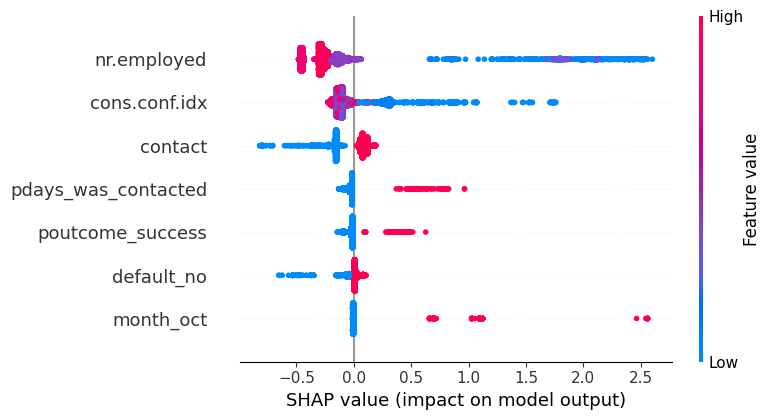

In [89]:
# TOP 7 SHAP
import shap

# Extraer nombres de features
X_test_df = pd.DataFrame(X_test, columns=features)

# Obtener valores SHAP
explainer = shap.Explainer(final_model)
shap_values = explainer(X_test_df)

# Calcular importancia media absoluta
shap_values_df = pd.DataFrame(shap_values.values, columns=X_test_df.columns)
mean_abs_shap = shap_values_df.abs().mean().sort_values(ascending=False)

# Seleccionar top 7
top_7_features = mean_abs_shap.head(7).index.tolist()
top_7_indices = [X_test_df.columns.get_loc(f) for f in top_7_features]

# Filtrar valores SHAP y X_test para esas columnas
top_7_shap_values = shap_values[:, top_7_indices]
top_7_X_test_df = X_test_df[top_7_features]

# Mostrar plot SHAP de resumen para top 7
shap.summary_plot(top_7_shap_values, top_7_X_test_df, plot_type="dot")